Favian Rajendra Ananta Putra
24/547756/PPA/06906

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('marketing.csv')
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [3]:
df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [4]:
# Shuffle the DataFrame to make it look more realistic for some plots
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Original df.info():")
df.info()
print("\n" + "="*50 + "\n")

Original df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB




In [5]:
# --- Handle Missing Values ---
print("Missing values before handling:")
print(df.isnull().sum())

# Option 1: Drop rows with missing 'Customer Name'
# df.dropna(subset=['Customer Name'], inplace=True)

# Option 2: Fill with a placeholder (if appropriate, less likely for names)
# df['Customer Name'].fillna('Unknown', inplace=True)

# For this example, let's drop the single row with missing 'Customer Name'
if df['Customer Name'].isnull().any():
    df.dropna(subset=['Customer Name'], inplace=True)
    print("\nMissing values after handling 'Customer Name':")
    print(df.isnull().sum())
else:
    print("\nNo missing 'Customer Name' found in the sample or it was already handled.")


# --- Convert Data Types ---
print(f"\nData type of 'Date' before conversion: {df['Date'].dtype}")
df['Date'] = pd.to_datetime(df['Date'])
print(f"Data type of 'Date' after conversion: {df['Date'].dtype}")


# --- Check for Duplicates ---
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
# To remove duplicates, if any:
# df.drop_duplicates(inplace=True)


# --- Review and Clean Object Columns (Example: strip whitespace, lowercase) ---
object_cols = df.select_dtypes(include='object').columns
print(f"\nObject columns to potentially clean: {list(object_cols)}")

for col in object_cols:
    if col not in ['Car_id', 'Customer Name', 'Dealer_No']: # IDs might be case-sensitive or have specific formats
        try:
            df[col] = df[col].str.strip().str.lower()
            print(f"Cleaned column: {col}")
        except AttributeError:
            print(f"Column {col} could not be processed with string methods (might not contain strings).")


print("\ndf.info() after initial cleaning and type conversion:")
df.info()
print("\n" + "="*50 + "\n")

Missing values before handling:
Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

Missing values after handling 'Customer Name':
Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

Data type of 'Date' before conversion: object
Data type of 'Date' after conversion: datetime64[ns]

Number of duplicate rows: 0

Object columns to potentially clean: ['Car_id', 'Customer Name', 'Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Dealer_No 


--- Gender ---
Gender
male      78.632085
female    21.367915
Name: proportion, dtype: float64


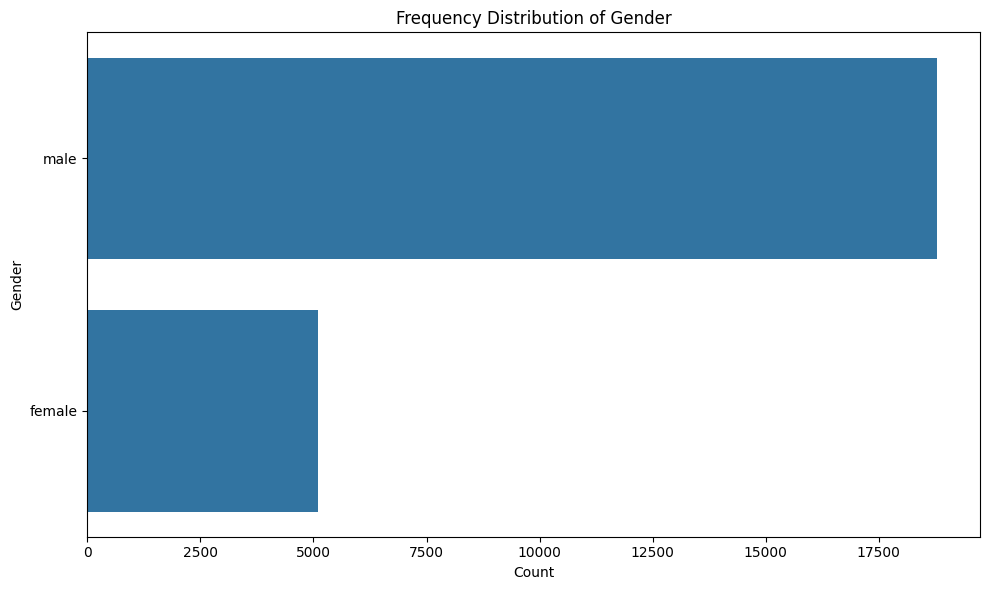


--- Company ---
Company
chevrolet     7.609287
dodge         6.985986
ford          6.751726
volkswagen    5.576239
mercedes-b    5.375444
Name: proportion, dtype: float64


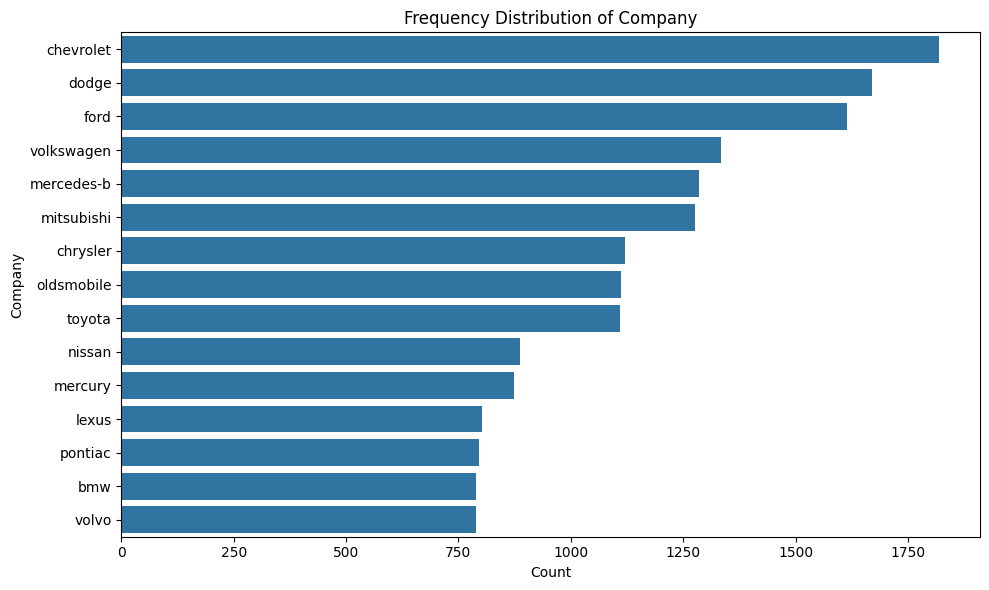


--- Model ---
Model
diamante      1.748588
silhouette    1.719306
prizm         1.719306
passat        1.635641
ram pickup    1.597992
Name: proportion, dtype: float64


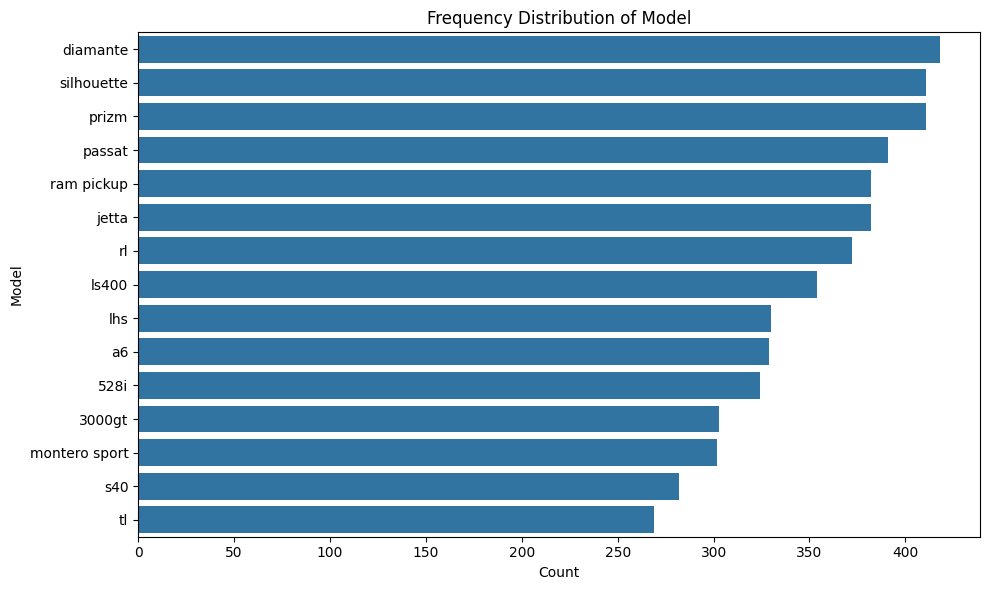


--- Engine ---
Engine
doubleâ overhead camshaft    52.583142
overhead camshaft            47.416858
Name: proportion, dtype: float64


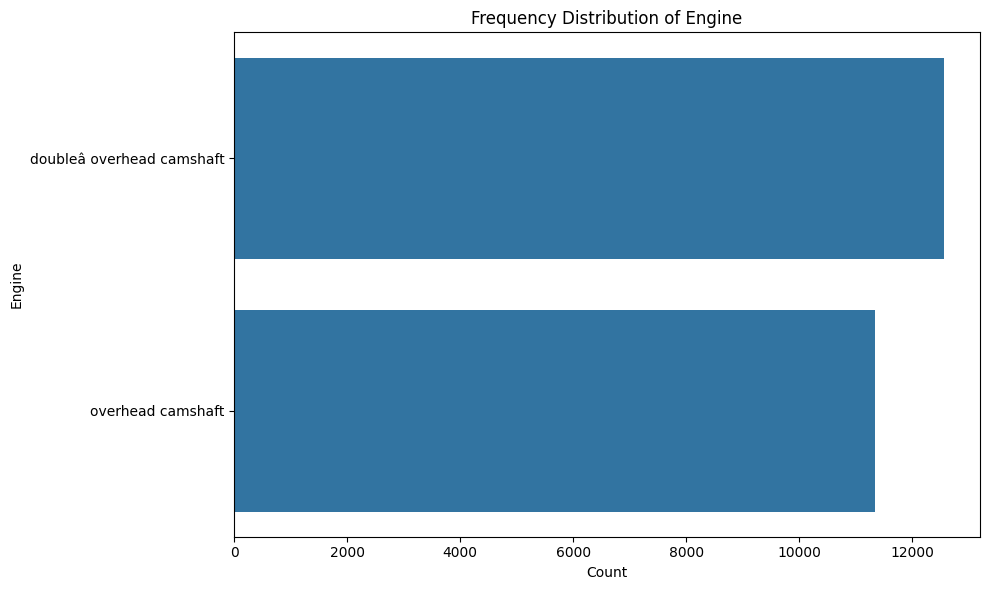


--- Transmission ---
Transmission
auto      52.583142
manual    47.416858
Name: proportion, dtype: float64


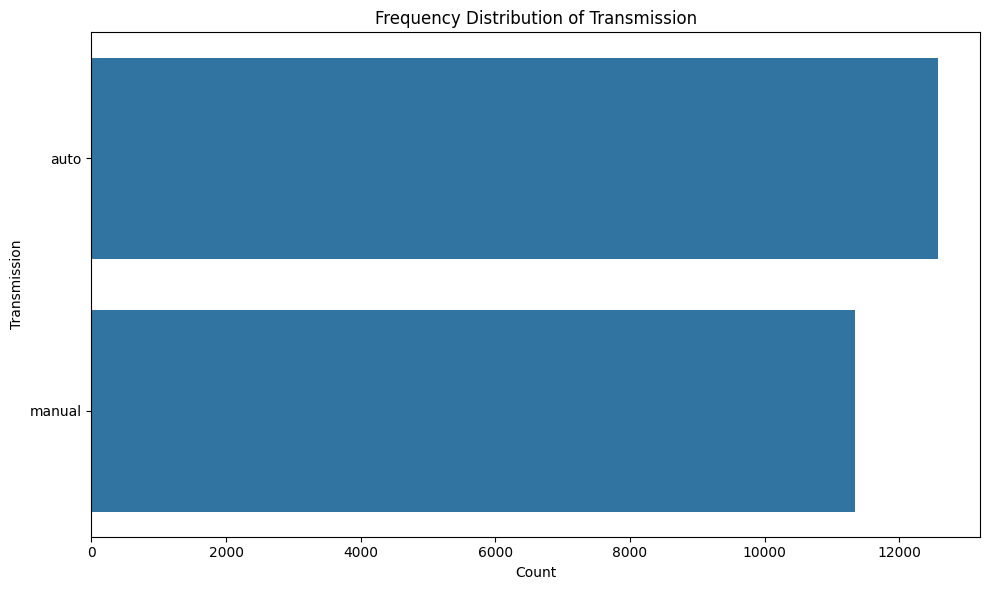


--- Color ---
Color
pale white    47.082200
black         32.867601
red           20.050199
Name: proportion, dtype: float64


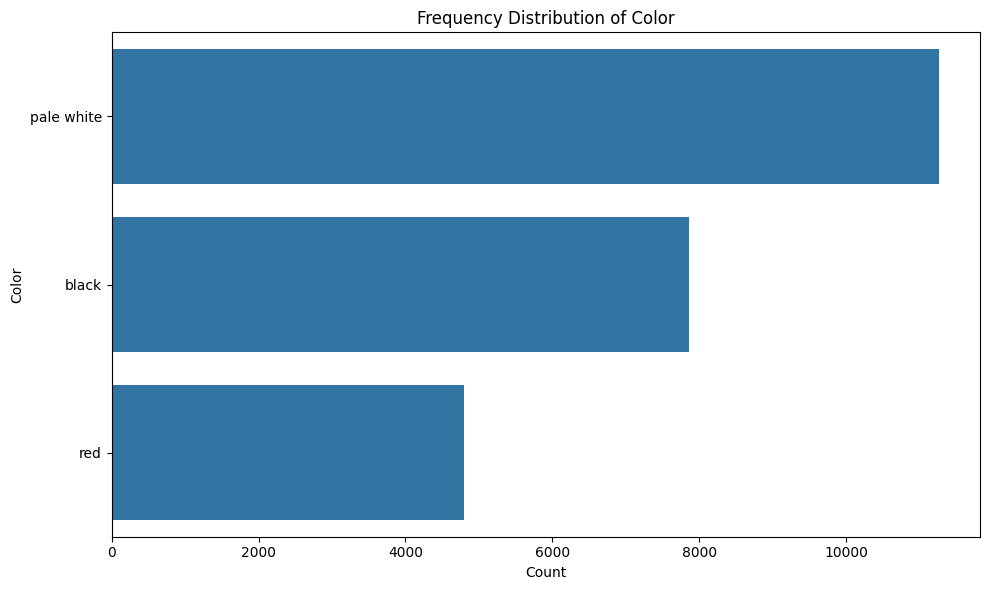


--- Body Style ---
Body Style
suv          26.663878
hatchback    25.634804
sedan        18.774315
passenger    16.502824
hardtop      12.424179
Name: proportion, dtype: float64


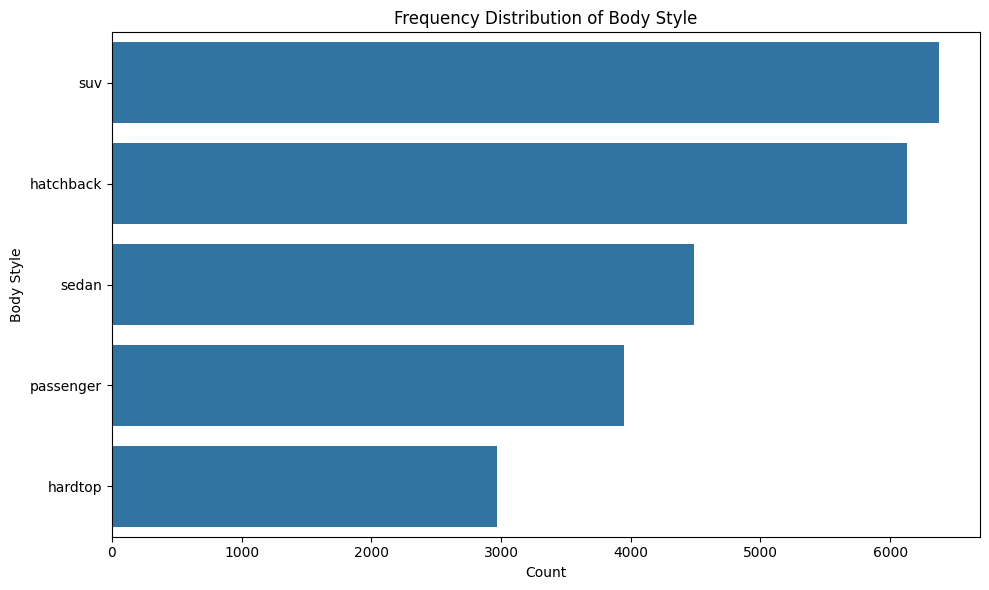


--- Dealer_Name ---
Dealer_Name
progressive shippers cooperative association no    5.513491
rabun used car sales                               5.492575
race car help                                      5.241581
saab-belle dodge                                   5.229032
star enterprises inc                               5.224848
Name: proportion, dtype: float64


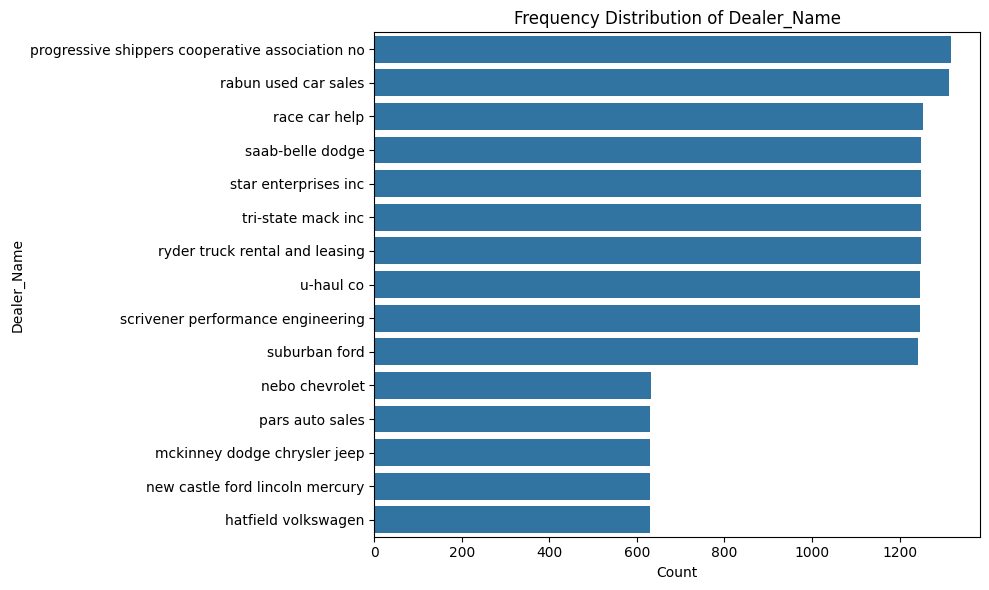


--- Dealer_Region ---
Dealer_Region
austin        17.297636
janesville    15.984104
scottsdale    14.361012
pasco         13.097678
aurora        13.089312
Name: proportion, dtype: float64


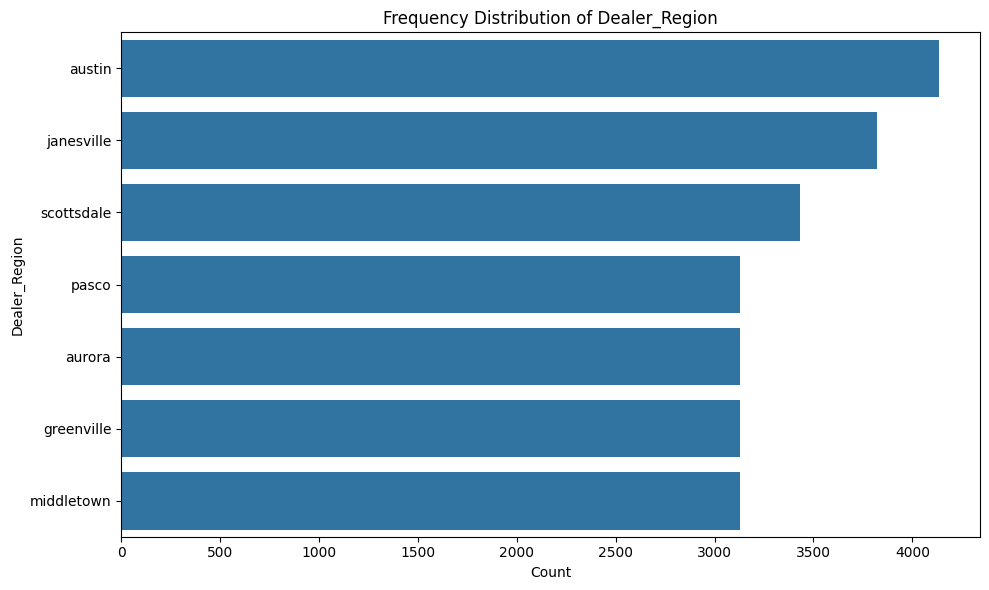


--- Descriptive Statistics for Numerical Features ---
       Annual Income     Price ($)
count   2.390500e+04  23905.000000
mean    8.308466e+05  28089.540473
std     7.200208e+05  14788.592495
min     1.008000e+04   1200.000000
25%     3.860000e+05  18001.000000
50%     7.350000e+05  23000.000000
75%     1.176000e+06  34000.000000
max     1.120000e+07  85800.000000

--- Annual Income ---


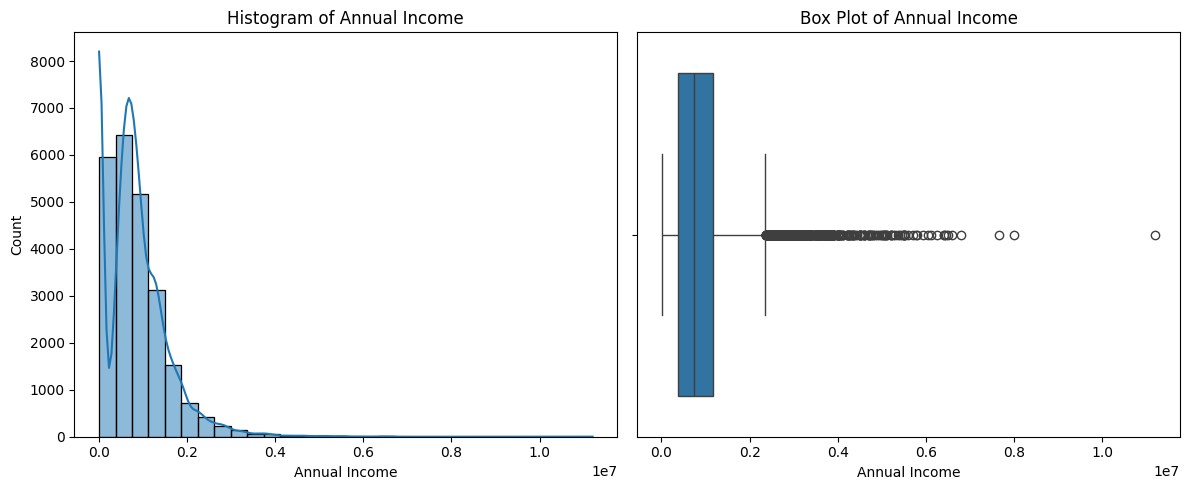


--- Price ($) ---


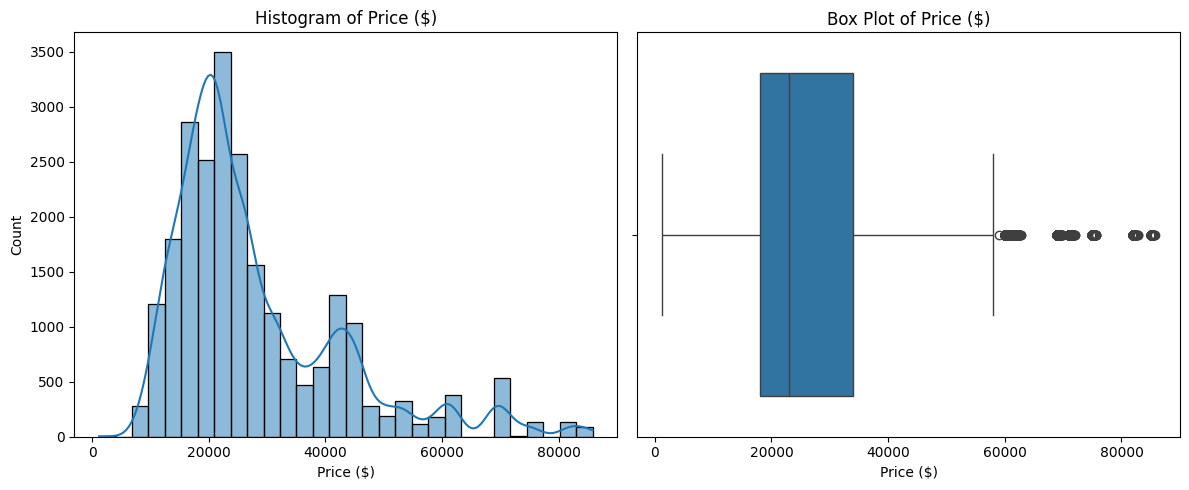


--- Date Feature Analysis ---


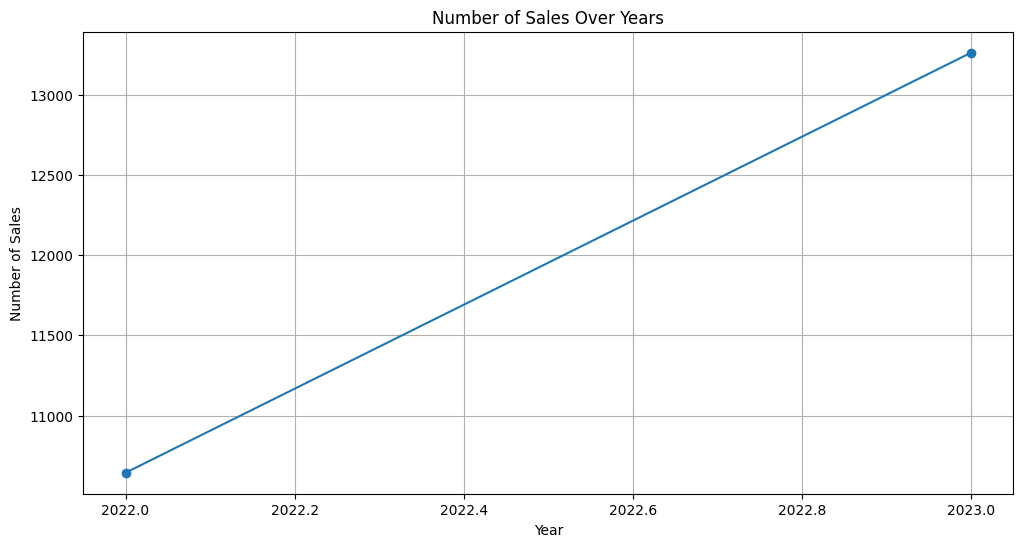

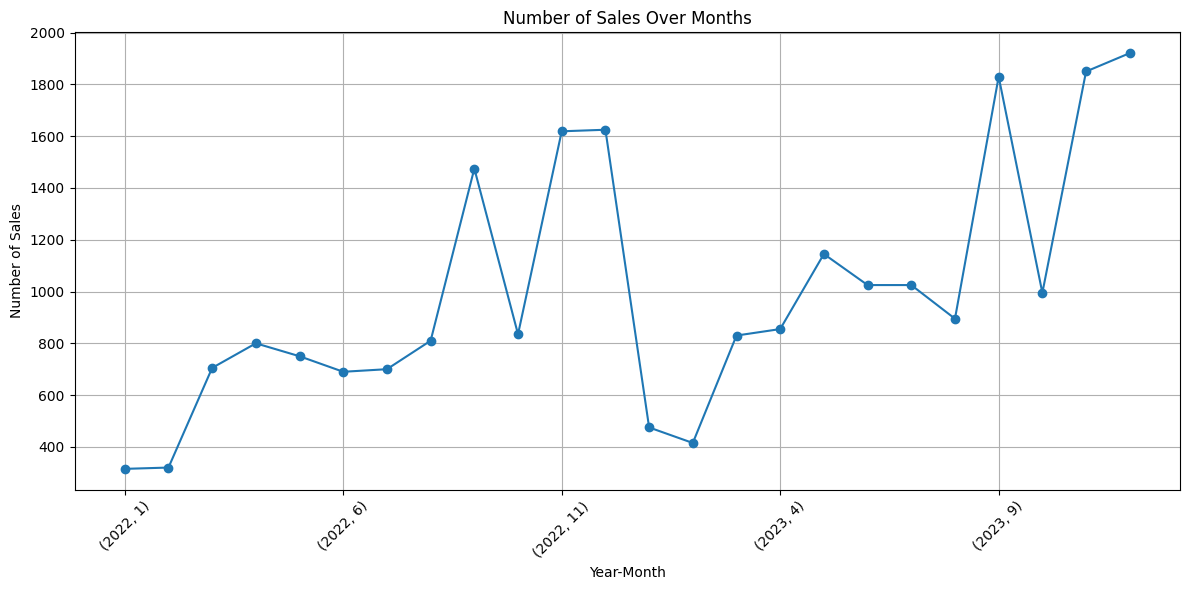

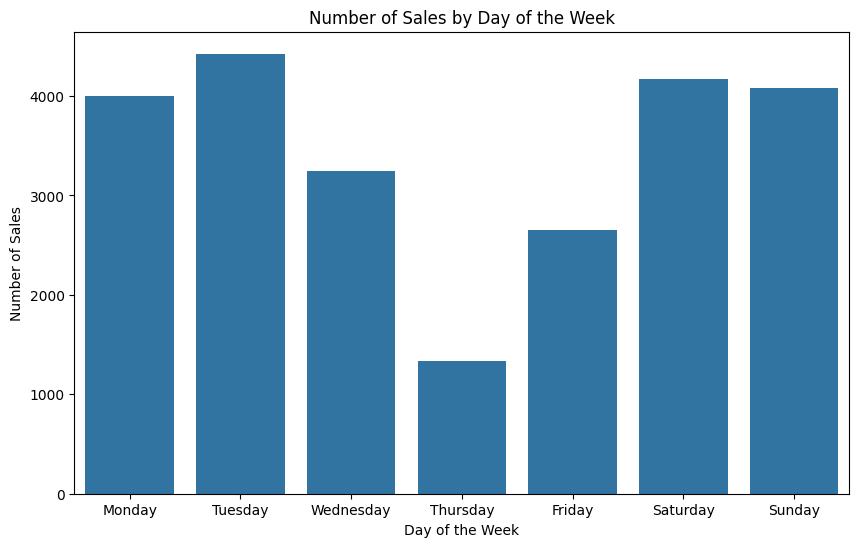

In [6]:
# --- Categorical Features ---
categorical_cols = ['Gender', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Body Style', 'Dealer_Name', 'Dealer_Region']

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(normalize=True).head() * 100) # Top 5 in percentage
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index[:15]) # Top 15 for cleaner plot
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


# --- Numerical Features ---
numerical_cols = ['Annual Income', 'Price ($)']

print("\n--- Descriptive Statistics for Numerical Features ---")
print(df[numerical_cols].describe())

for col in numerical_cols:
    print(f"\n--- {col} ---")
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

# --- Datetime Feature ---
print("\n--- Date Feature Analysis ---")
df['Sale_Year'] = df['Date'].dt.year
df['Sale_Month'] = df['Date'].dt.month
df['Sale_Day_Name'] = df['Date'].dt.day_name()

plt.figure(figsize=(12, 6))
df.groupby('Sale_Year')['Car_id'].count().plot(kind='line', marker='o')
plt.title('Number of Sales Over Years')
plt.ylabel('Number of Sales')
plt.xlabel('Year')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
df.groupby(['Sale_Year', 'Sale_Month'])['Car_id'].count().plot(kind='line', marker='o')
plt.title('Number of Sales Over Months')
plt.ylabel('Number of Sales')
plt.xlabel('Year-Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Sale_Day_Name', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sales')
plt.show()

print("\n" + "="*50 + "\n")


--- Annual Income vs. Price ($) ---


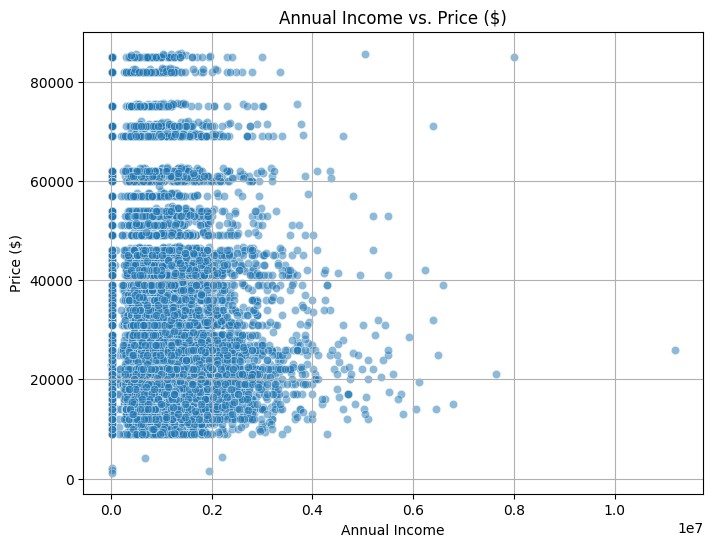

Correlation between Annual Income and Price ($): 0.01


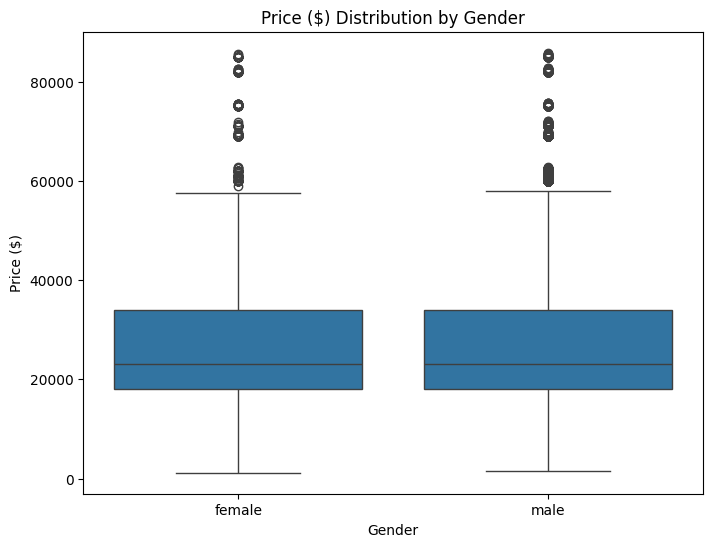

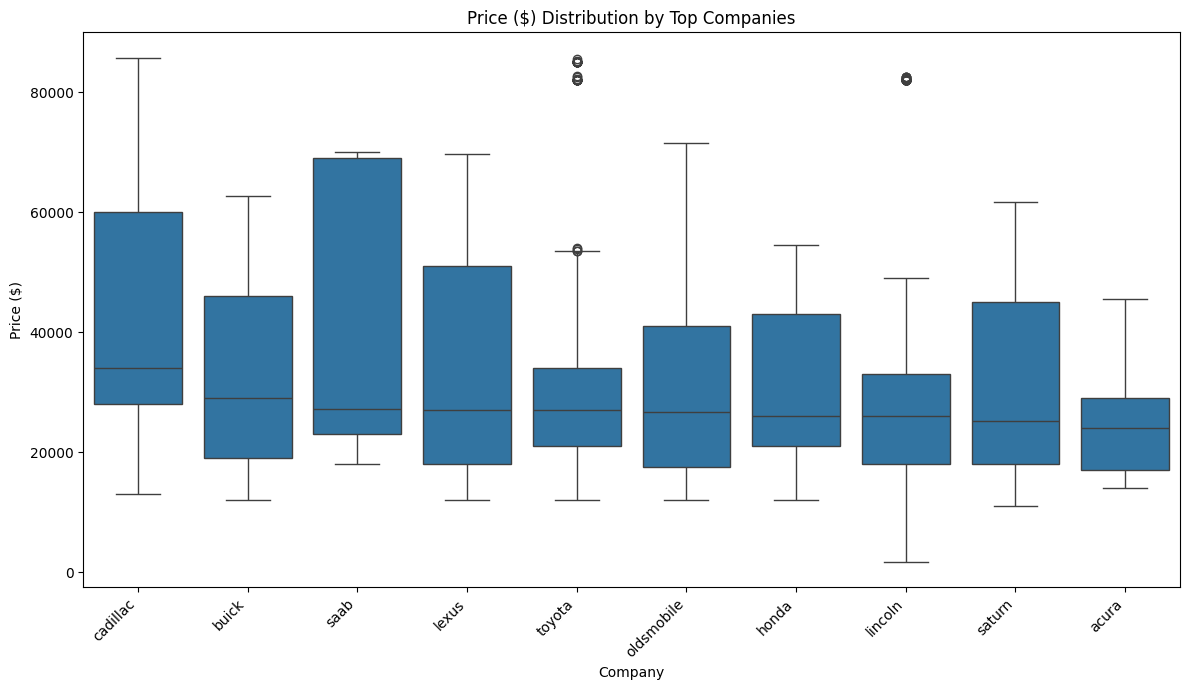

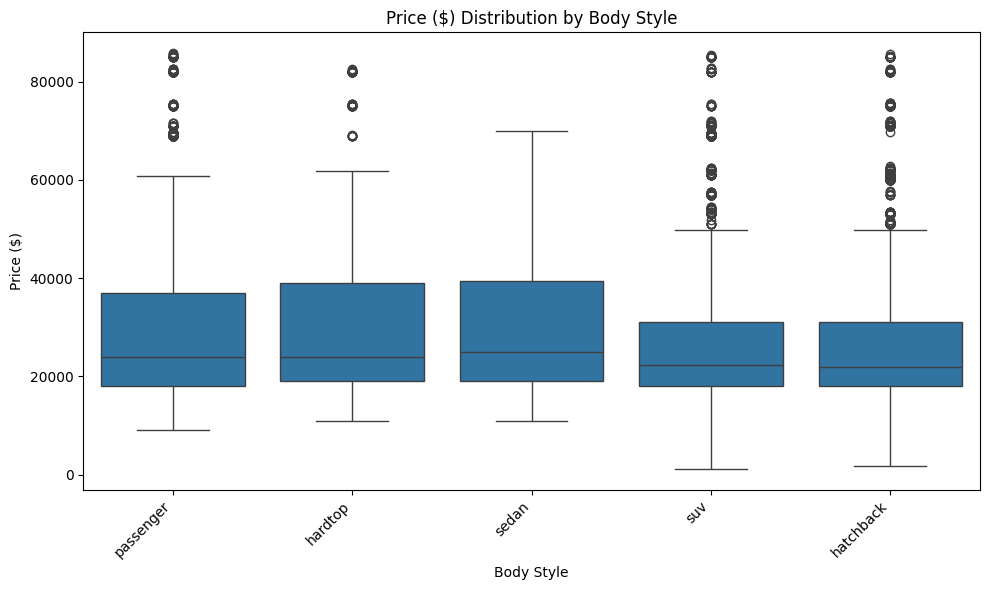

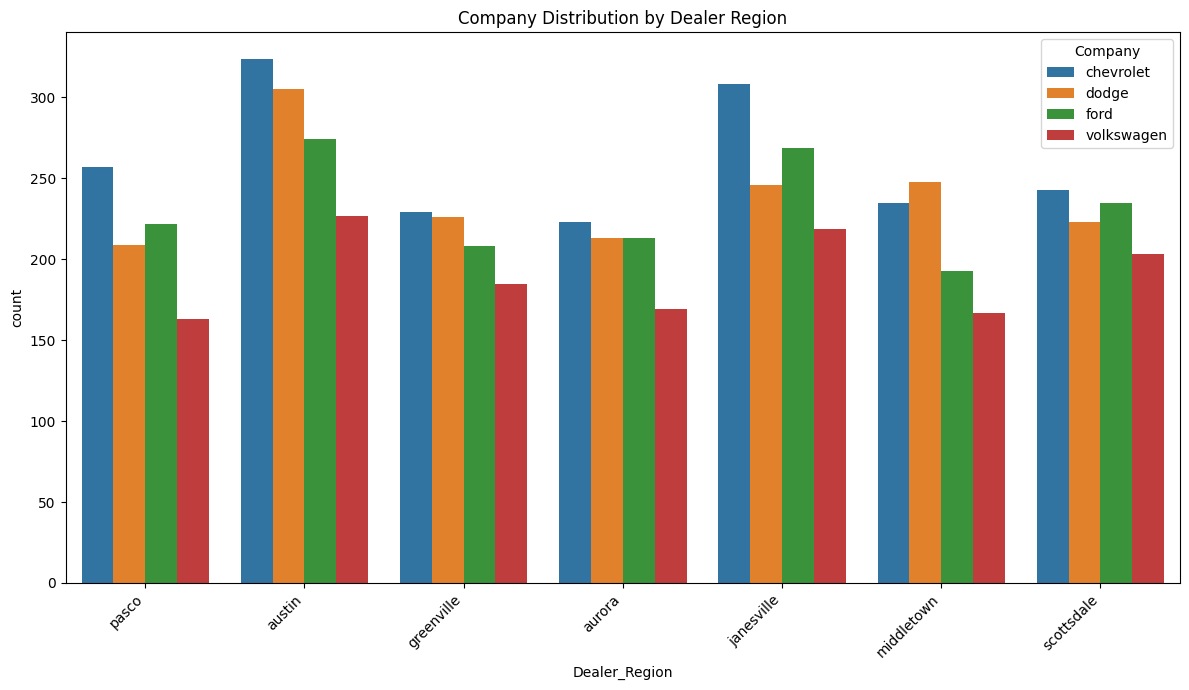


Crosstab: Body Style vs. Transmission
Transmission       auto     manual
Body Style                        
hardtop       47.373737  52.626263
hatchback     56.429504  43.570496
passenger     51.204056  48.795944
sedan         57.909982  42.090018
suv           48.415438  51.584562


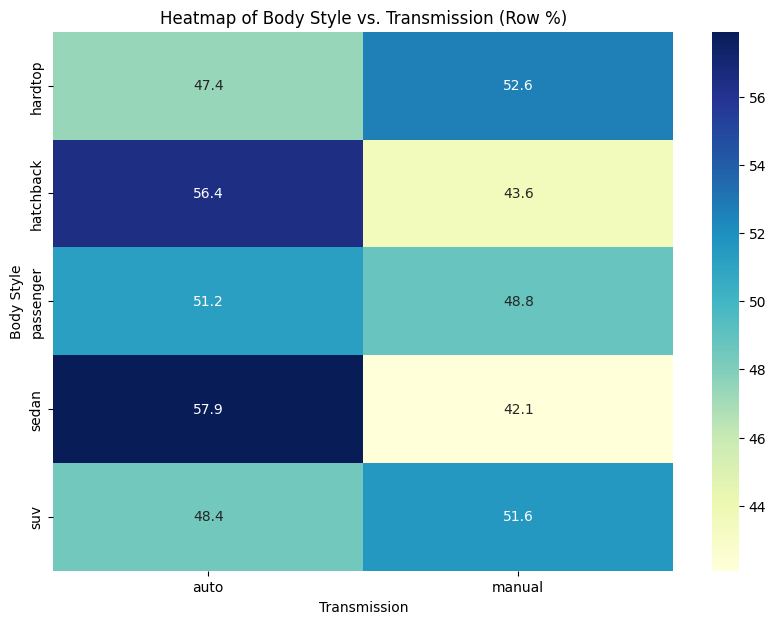

In [7]:
# --- Numerical vs. Numerical ---
print("\n--- Annual Income vs. Price ($) ---")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', data=df, alpha=0.5)
plt.title('Annual Income vs. Price ($)')
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

correlation = df['Annual Income'].corr(df['Price ($)'])
print(f"Correlation between Annual Income and Price ($): {correlation:.2f}")


# --- Categorical vs. Numerical ---
# Example: Gender vs. Price ($)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Price ($)', data=df)
plt.title('Price ($) Distribution by Gender')
plt.show()

# Example: Company vs. Price ($)
plt.figure(figsize=(12, 7))
# Taking top N companies by median price for cleaner plot, or by count
top_companies = df.groupby('Company')['Price ($)'].median().nlargest(10).index
sns.boxplot(x='Company', y='Price ($)', data=df[df['Company'].isin(top_companies)], order=top_companies)
plt.title('Price ($) Distribution by Top Companies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Example: Body Style vs. Price ($)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Body Style', y='Price ($)', data=df)
plt.title('Price ($) Distribution by Body Style')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# --- Categorical vs. Categorical ---
# Example: Company vs. Dealer_Region
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Dealer_Region', hue='Company', hue_order=df['Company'].value_counts().index[:4]) # hue for top 4 companies
plt.title('Company Distribution by Dealer Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nCrosstab: Body Style vs. Transmission")
crosstab_bt = pd.crosstab(df['Body Style'], df['Transmission'], normalize='index') * 100 # normalize by row (index)
print(crosstab_bt)

plt.figure(figsize=(10, 7))
sns.heatmap(crosstab_bt, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Body Style vs. Transmission (Row %)')
plt.show()


print("\n" + "="*50 + "\n")

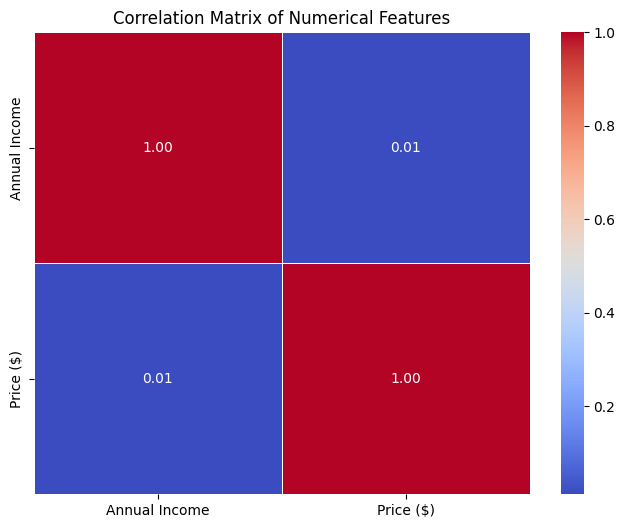

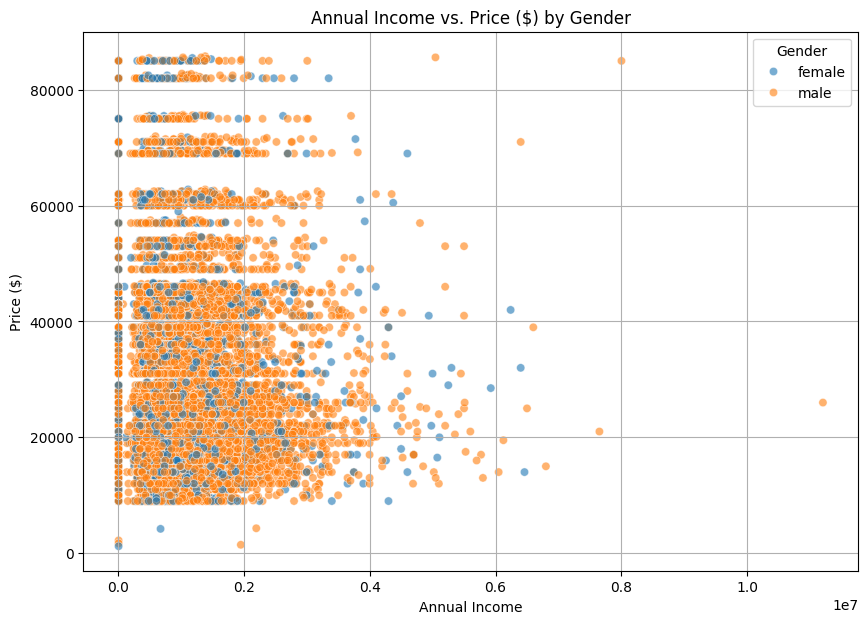

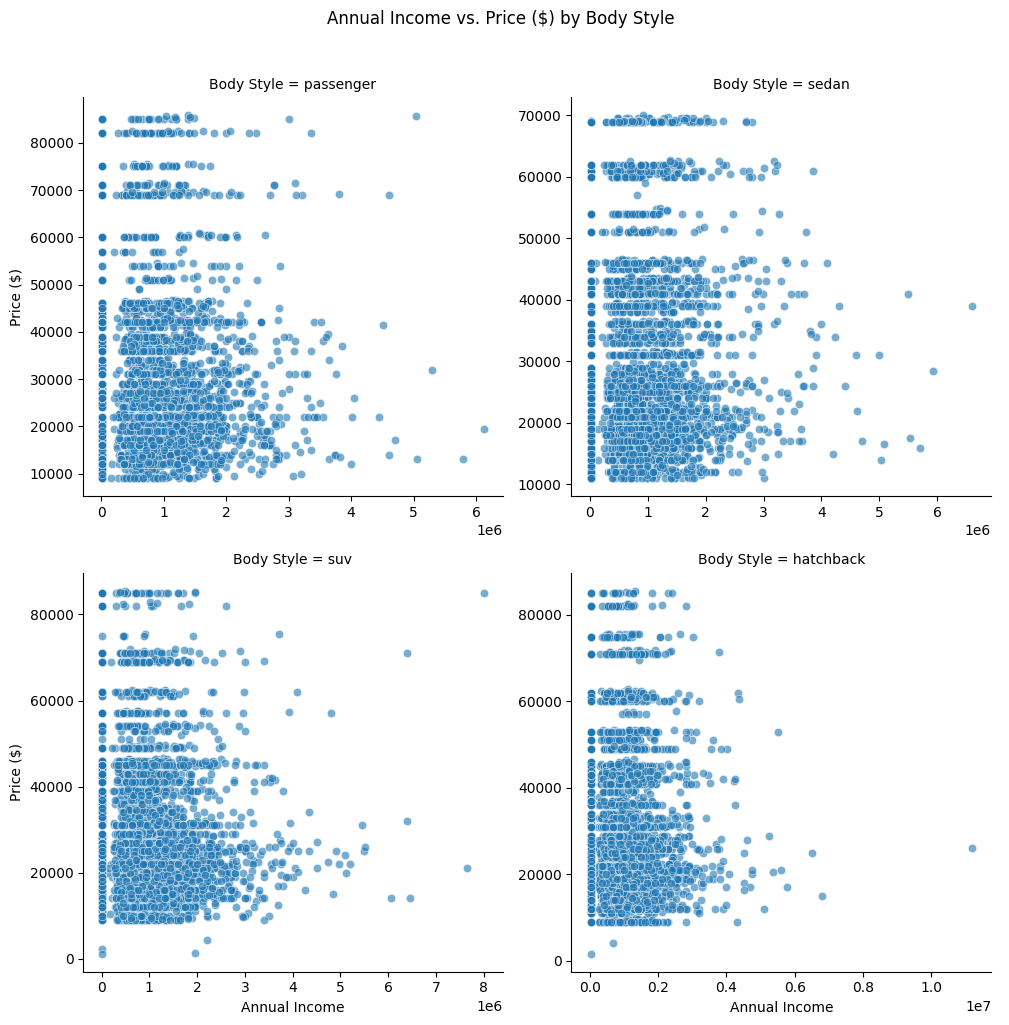



EDA Code Examples Complete.


In [8]:
# --- Correlation Matrix for Numerical Features ---
numerical_df_for_corr = df[['Annual Income', 'Price ($)']] # Add other true numericals if any
correlation_matrix = numerical_df_for_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# --- Grouped Visualizations ---
# Example: Price ($) vs. Annual Income, colored by Gender
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Gender', data=df, alpha=0.6)
plt.title('Annual Income vs. Price ($) by Gender')
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend(title='Gender')
plt.show()

# Example: Price ($) vs. Annual Income, faceted by Body Style (top 4 body styles for readability)
top_body_styles = df['Body Style'].value_counts().nlargest(4).index
g = sns.FacetGrid(df[df['Body Style'].isin(top_body_styles)], col="Body Style", col_wrap=2, height=5, sharex=False, sharey=False)
g.map(sns.scatterplot, "Annual Income", "Price ($)", alpha=0.6)
g.add_legend()
plt.suptitle('Annual Income vs. Price ($) by Body Style', y=1.02) # Adjust y for suptitle
plt.tight_layout()
plt.show()

print("\n" + "="*50 + "\n")
print("EDA Code Examples Complete.")

In [9]:
from scipy import stats # For hypothesis testing
from statsmodels.tsa.seasonal import seasonal_decompose # For time series decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # For segmentation example

In [10]:
# --- Ensure previous feature engineering is available ---
if 'Sale_Year' not in df.columns: # Basic check
    df['Date'] = pd.to_datetime(df['Date']) # Ensure Date is datetime
    df['Sale_Year'] = df['Date'].dt.year
    df['Sale_Month'] = df['Date'].dt.month
    df['Sale_Day_Name'] = df['Date'].dt.day_name()
    # Handle Customer Name NaN if it was re-introduced
    if df['Customer Name'].isnull().any():
        df.dropna(subset=['Customer Name'], inplace=True)

print("DataFrame head before deeper EDA:")
print(df.head())
print("\n" + "="*50 + "\n")

DataFrame head before deeper EDA:
         Car_id       Date Customer Name  Gender  Annual Income  \
0  C_CND_003394 2022-06-21         Laura  female        1055000   
1  C_CND_000517 2022-02-15       Brandon    male          13500   
2  C_CND_000537 2022-02-16        Declan    male         825000   
3  C_CND_016109 2023-07-22       Allison    male         371500   
4  C_CND_018912 2023-09-25     Christian  female          13500   

                       Dealer_Name     Company      Model  \
0             star enterprises inc       buick      regal   
1               tri-state mack inc    chrysler   concorde   
2                  pars auto sales    plymouth     breeze   
3                 c & m motors inc       buick    century   
4  new castle ford lincoln mercury  mercedes-b  clk coupe   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  doubleâ overhead camshaft         auto       black      19500  99301-3882   
1  doubleâ overhead camshaft        


--- 1. Dealer Performance Analysis ---

Total Sales Value by Dealer Region:
Dealer_Region
austin        117192531
janesville    106351234
scottsdale     95969374
aurora         88642382
greenville     88149602
pasco          88040714
middletown     87134628
Name: Price ($), dtype: int64


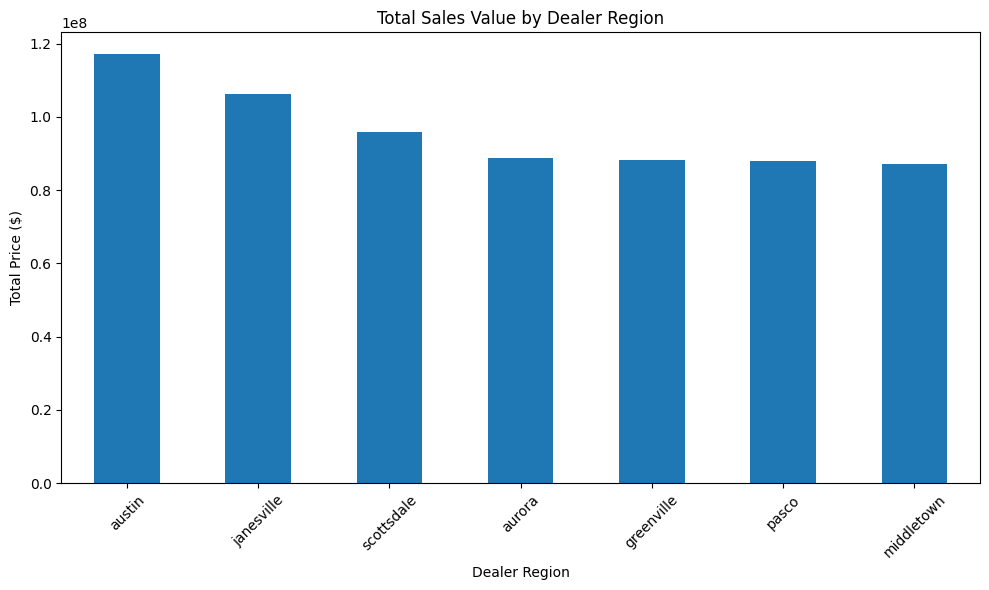


Average Car Price by Top 10 Dealer Names (by sales volume):
Dealer_Name
u-haul co                                          28769.919006
rabun used car sales                               28527.536177
scrivener performance engineering                  28297.371589
saab-belle dodge                                   28176.692000
race car help                                      28163.372706
star enterprises inc                               28113.055244
suburban ford                                      28112.206758
tri-state mack inc                                 28095.562050
ryder truck rental and leasing                     27914.988782
progressive shippers cooperative association no    27884.264036
Name: Price ($), dtype: float64


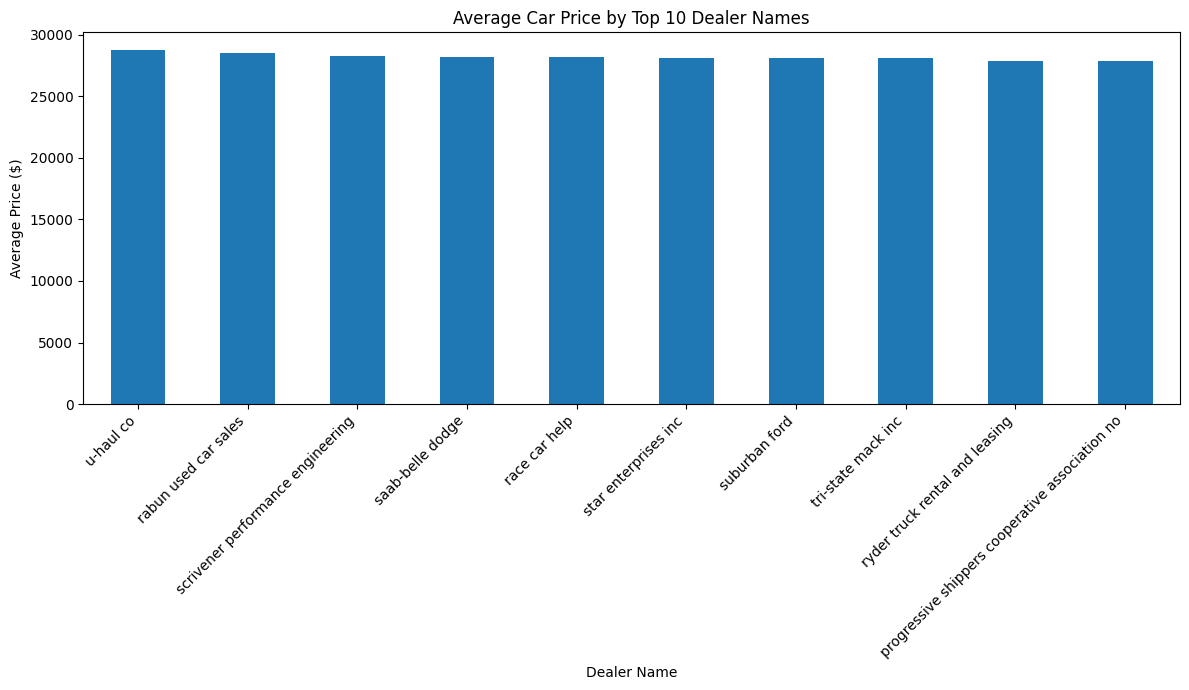


Sales Volume (Units) by Dealer Region:
Dealer_Region
austin        4135
janesville    3821
scottsdale    3433
pasco         3131
aurora        3129
greenville    3128
middletown    3128
Name: Car_id, dtype: int64


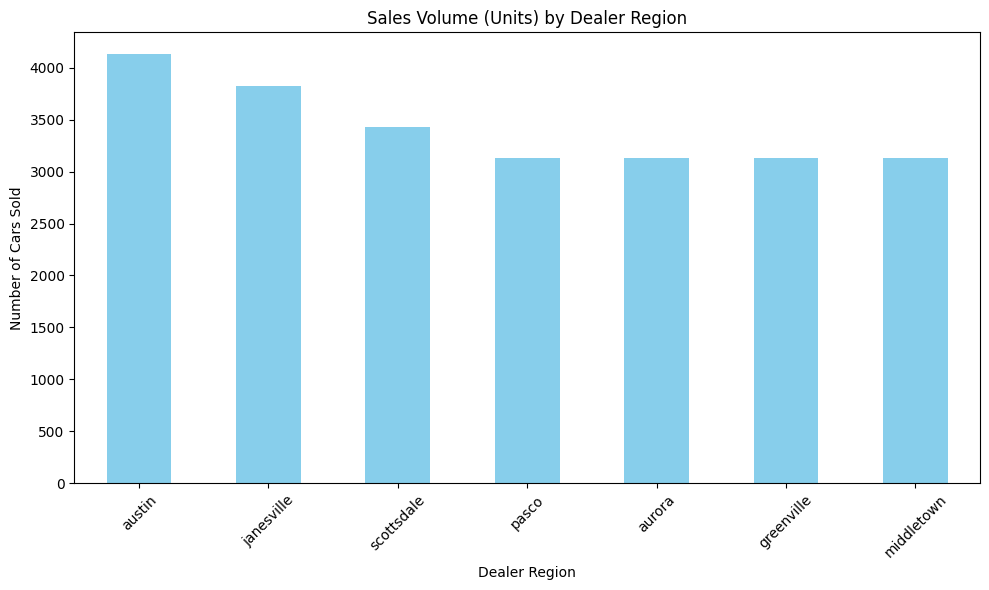


Top 3 Companies by Sales Volume per Dealer Region:
    Dealer_Region    Company  Count
5          aurora  chevrolet    223
7          aurora      dodge    213
8          aurora       ford    213
35         austin  chevrolet    324
37         austin      dodge    305
38         austin       ford    274
65     greenville  chevrolet    229
67     greenville      dodge    226
68     greenville       ford    208
95     janesville  chevrolet    308
98     janesville       ford    269
97     janesville      dodge    246
127    middletown      dodge    248
125    middletown  chevrolet    235
128    middletown       ford    193
155         pasco  chevrolet    257
158         pasco       ford    222
157         pasco      dodge    209
185    scottsdale  chevrolet    243
188    scottsdale       ford    235
187    scottsdale      dodge    223


<Figure size 1400x800 with 0 Axes>

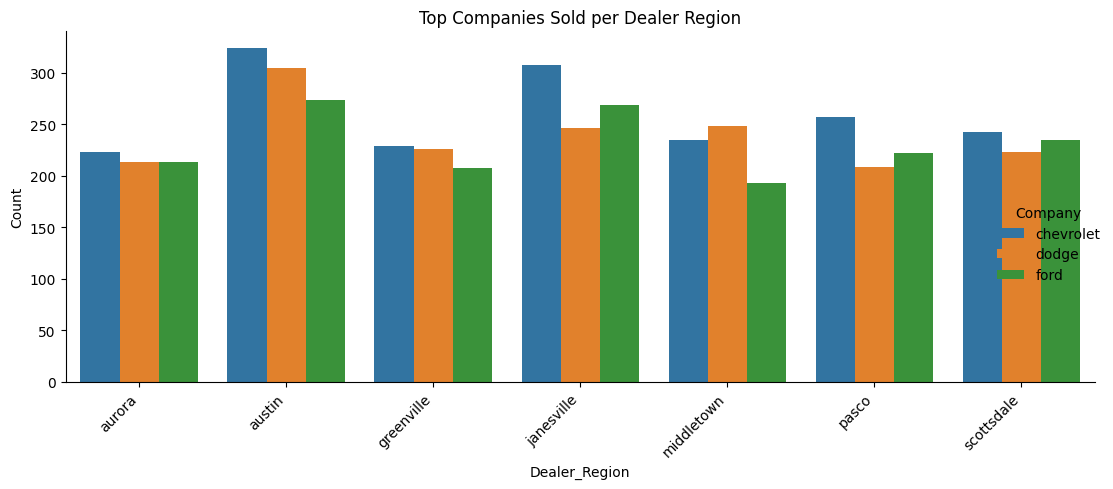

In [11]:
print("\n--- 1. Dealer Performance Analysis ---")

# Total sales value by Dealer_Region
region_sales_value = df.groupby('Dealer_Region')['Price ($)'].sum().sort_values(ascending=False)
print("\nTotal Sales Value by Dealer Region:")
print(region_sales_value)
plt.figure(figsize=(10, 6))
region_sales_value.plot(kind='bar')
plt.title('Total Sales Value by Dealer Region')
plt.ylabel('Total Price ($)')
plt.xlabel('Dealer Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average price by Dealer_Name (Top 10 dealers by sales volume for clarity)
top_dealers_by_volume = df['Dealer_Name'].value_counts().nlargest(10).index
dealer_avg_price = df[df['Dealer_Name'].isin(top_dealers_by_volume)].groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("\nAverage Car Price by Top 10 Dealer Names (by sales volume):")
print(dealer_avg_price)
plt.figure(figsize=(12, 7))
dealer_avg_price.plot(kind='bar')
plt.title('Average Car Price by Top 10 Dealer Names')
plt.ylabel('Average Price ($)')
plt.xlabel('Dealer Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Sales volume (units) by Dealer_Region
region_sales_volume = df.groupby('Dealer_Region')['Car_id'].count().sort_values(ascending=False)
print("\nSales Volume (Units) by Dealer Region:")
print(region_sales_volume)
plt.figure(figsize=(10, 6))
region_sales_volume.plot(kind='bar', color='skyblue')
plt.title('Sales Volume (Units) by Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.xlabel('Dealer Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Product Mix: Top Companies sold per Dealer_Region
# Showing top 3 companies per region for illustration
product_mix_region = df.groupby(['Dealer_Region', 'Company'])['Car_id'].count().reset_index(name='Count')
product_mix_region = product_mix_region.sort_values(['Dealer_Region', 'Count'], ascending=[True, False])
top_companies_per_region = product_mix_region.groupby('Dealer_Region').head(3)

print("\nTop 3 Companies by Sales Volume per Dealer Region:")
print(top_companies_per_region)

plt.figure(figsize=(14, 8))
sns.catplot(x='Dealer_Region', y='Count', hue='Company', data=top_companies_per_region, kind='bar', aspect=2)
plt.title('Top Companies Sold per Dealer Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
print("\n--- 2. Customer-Centric Analysis (Conceptual) ---")
# This is highly dependent on data quality.
# Assuming 'Customer Name' and 'Phone' might help identify repeats.
# This is a simplified example. Real-world identification is more complex.

# Count occurrences of Customer Name + Phone combination
df['Customer_Identifier'] = df['Customer Name'].astype(str) + "_" + df['Phone'].astype(str)
potential_repeats = df['Customer_Identifier'].value_counts()
repeat_buyers = potential_repeats[potential_repeats > 1]

print(f"\nNumber of potential repeat customer identifiers: {len(repeat_buyers)}")
print("Top 5 potential repeat customer identifiers and their purchase counts:")
print(repeat_buyers.head())

if not repeat_buyers.empty:
    # Analyze purchases of top repeat buyer
    top_repeat_identifier = repeat_buyers.index[0]
    print(f"\nPurchases by potential top repeat identifier '{top_repeat_identifier}':")
    print(df[df['Customer_Identifier'] == top_repeat_identifier][['Date', 'Company', 'Model', 'Price ($)']])
else:
    print("\nNo repeat buyers found with this simple identifier in the sample data.")


--- 2. Customer-Centric Analysis (Conceptual) ---

Number of potential repeat customer identifiers: 0
Top 5 potential repeat customer identifiers and their purchase counts:
Series([], Name: count, dtype: int64)

No repeat buyers found with this simple identifier in the sample data.



--- 3. Product Analysis ---

Approximate Market Share by Company (% of units sold):
Company
chevrolet     7.609287
dodge         6.985986
ford          6.751726
volkswagen    5.576239
mercedes-b    5.375444
mitsubishi    5.341979
chrysler      4.685212
oldsmobile    4.647563
toyota        4.643380
nissan        3.706338
mercury       3.656139
lexus         3.354947
pontiac       3.329847
bmw           3.304748
volvo         3.300565
honda         2.961723
acura         2.882242
cadillac      2.727463
plymouth      2.581050
saturn        2.451370
lincoln       2.058147
audi          1.957749
buick         1.836436
subaru        1.694206
jeep          1.518511
porsche       1.510144
hyundai       1.104371
saab          0.878477
infiniti      0.815729
jaguar        0.752981
Name: proportion, dtype: float64


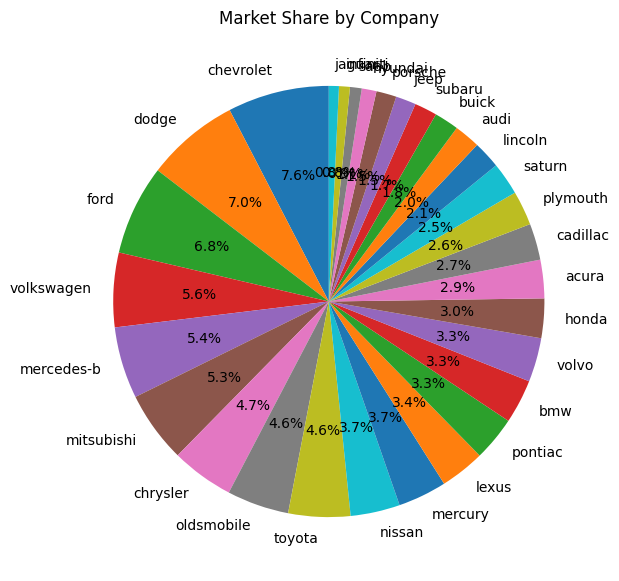


Most Popular Body Style and Engine Combinations:
  Body Style                     Engine  Count
2  hatchback  doubleâ overhead camshaft   3458
9        suv          overhead camshaft   3288
8        suv  doubleâ overhead camshaft   3086
3  hatchback          overhead camshaft   2670
6      sedan  doubleâ overhead camshaft   2599
4  passenger  doubleâ overhead camshaft   2020
5  passenger          overhead camshaft   1925
7      sedan          overhead camshaft   1889
1    hardtop          overhead camshaft   1563
0    hardtop  doubleâ overhead camshaft   1407


C:\Users\favia\AppData\Local\Temp\ipykernel_21592\200105150.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_n_combinations, x='Count', y=top_n_combinations['Body Style'] + " + " + top_n_combinations['Engine'], palette="viridis")


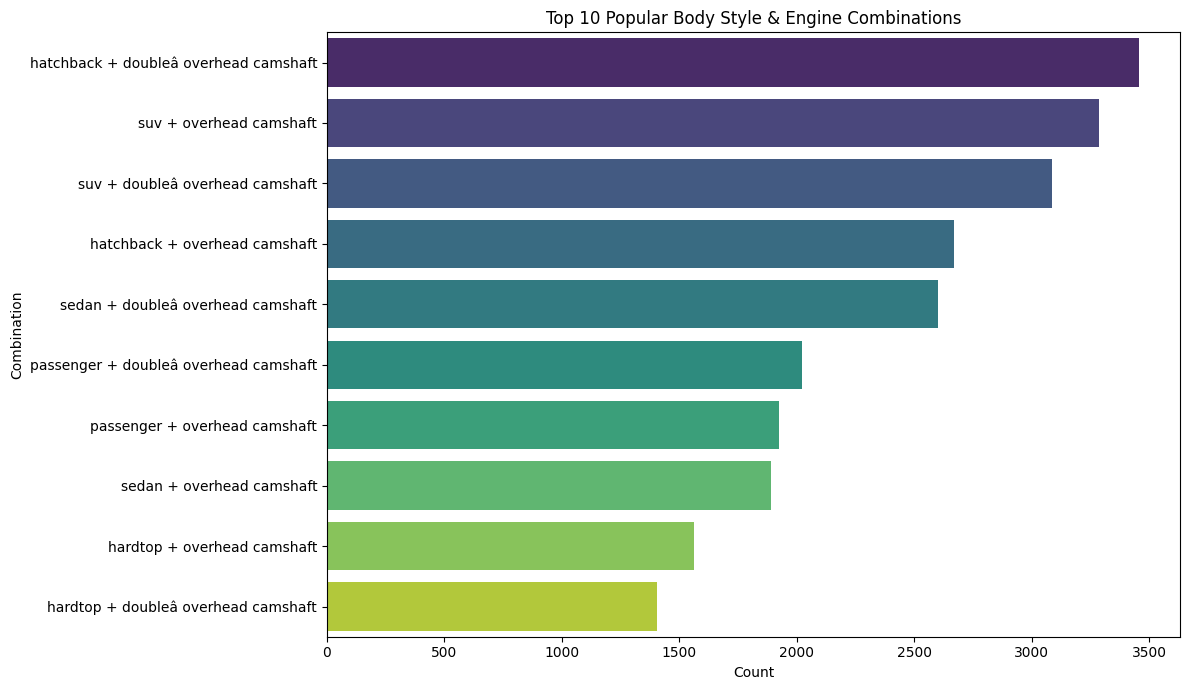

In [13]:
print("\n--- 3. Product Analysis ---")

# Approximate Market Share by Company (based on sales volume)
company_market_share = (df['Company'].value_counts(normalize=True) * 100).sort_values(ascending=False)
print("\nApproximate Market Share by Company (% of units sold):")
print(company_market_share)
plt.figure(figsize=(12, 7))
company_market_share.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Market Share by Company')
plt.ylabel('') # Hide the default 'Company' ylabel
plt.show()

# Popular Feature Combinations (e.g., Body Style and Engine)
popular_combinations = df.groupby(['Body Style', 'Engine']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
print("\nMost Popular Body Style and Engine Combinations:")
print(popular_combinations.head(10))

plt.figure(figsize=(12,7))
# For better visualization, let's take top N combinations
top_n_combinations = popular_combinations.head(10)
sns.barplot(data=top_n_combinations, x='Count', y=top_n_combinations['Body Style'] + " + " + top_n_combinations['Engine'], palette="viridis")
plt.title('Top 10 Popular Body Style & Engine Combinations')
plt.xlabel('Count')
plt.ylabel('Combination')
plt.tight_layout()
plt.show()


--- 4. Advanced Time Series Analysis ---


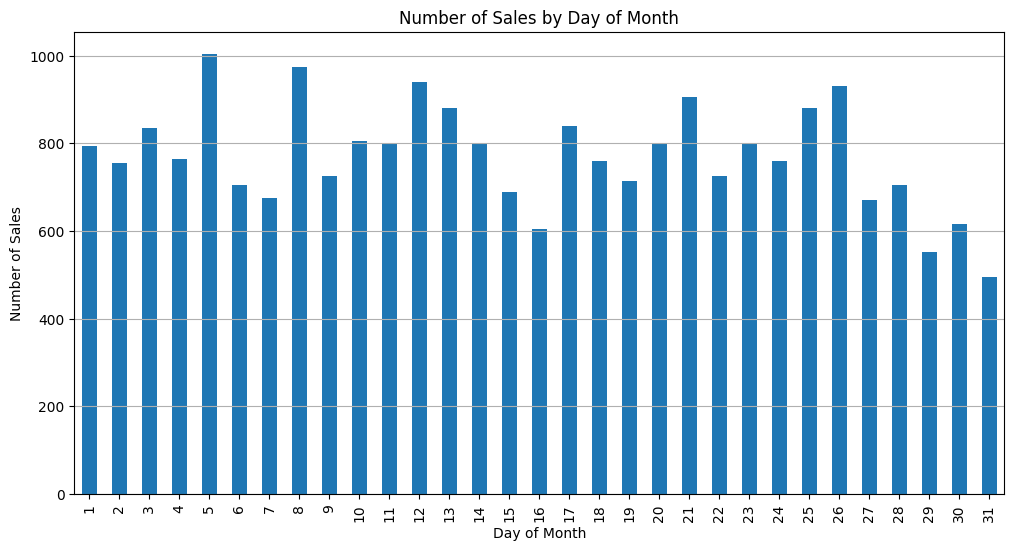

C:\Users\favia\AppData\Local\Temp\ipykernel_21592\1590245521.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Date')['Price ($)'].resample('M').sum() # Sum of Price


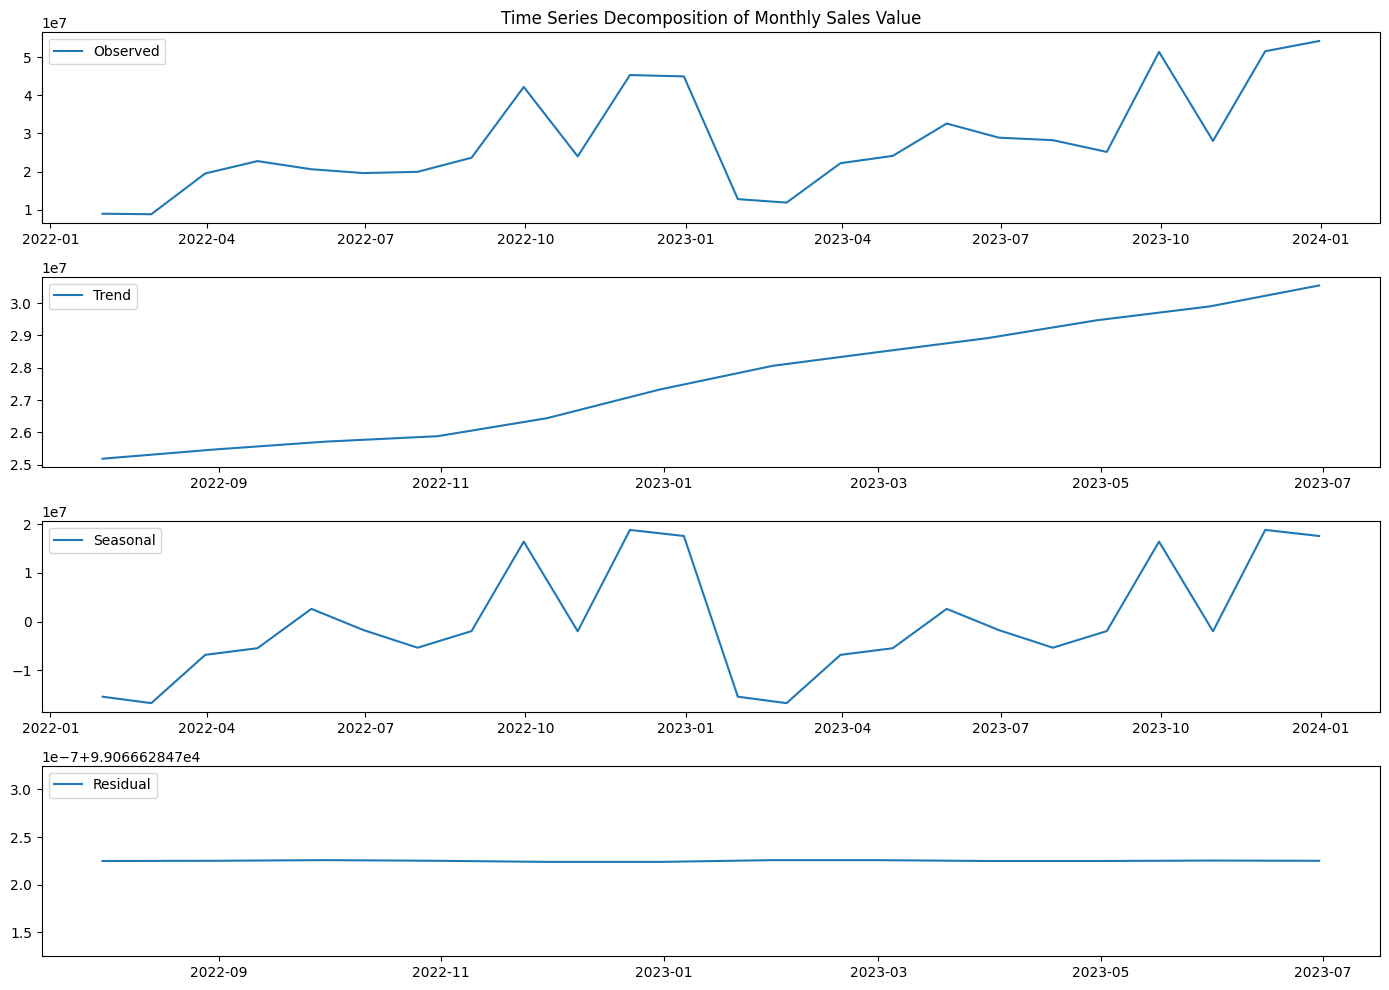

In [14]:
print("\n--- 4. Advanced Time Series Analysis ---")
df['Sale_Day'] = df['Date'].dt.day

# Sales by Day of Month
plt.figure(figsize=(12, 6))
df.groupby('Sale_Day')['Car_id'].count().plot(kind='bar')
plt.title('Number of Sales by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Sales')
plt.grid(axis='y')
plt.show()

# Time Series Decomposition (Example on Monthly Sales)
# Resample data to monthly frequency, summing sales (or counting units)
monthly_sales = df.set_index('Date')['Price ($)'].resample('M').sum() # Sum of Price
# Or for units: monthly_sales = df.set_index('Date')['Car_id'].resample('M').count()

# Ensure we have enough periods for decomposition (e.g., at least 2 full cycles)
if len(monthly_sales) >= 24: # Assuming monthly data, need 2 years for good seasonal decomp
    decomposition = seasonal_decompose(monthly_sales, model='additive', period=12) # Assuming yearly seasonality

    plt.figure(figsize=(14, 10))
    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.legend(loc='upper left')
    plt.title('Time Series Decomposition of Monthly Sales Value')
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("\nNot enough monthly data points for a meaningful seasonal decomposition (need at least 2 full periods, e.g., 24 months).")


--- 5. Income vs. Spending Habits ---


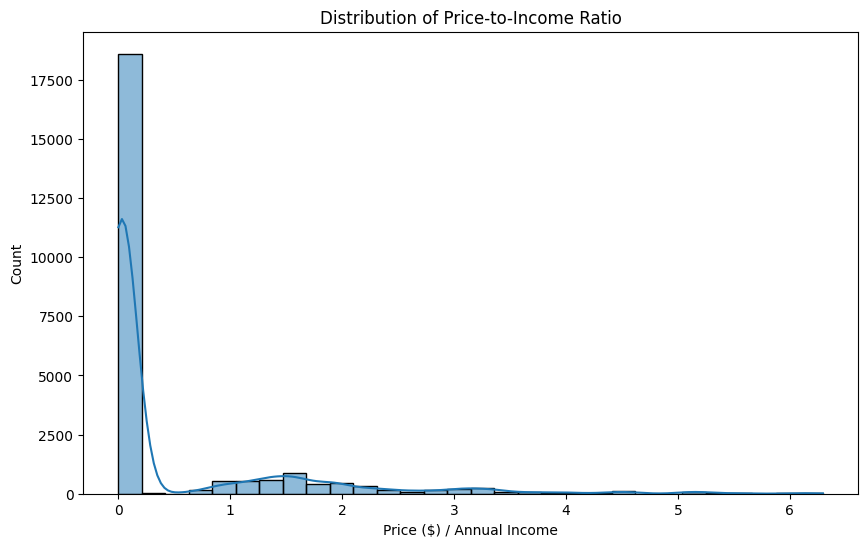


Descriptive stats for Price-to-Income Ratio:
count    23905.000000
mean         0.482962
std          0.989123
min          0.000742
25%          0.019565
50%          0.034831
75%          0.095946
max          6.296370
Name: Price_to_Income_Ratio, dtype: float64


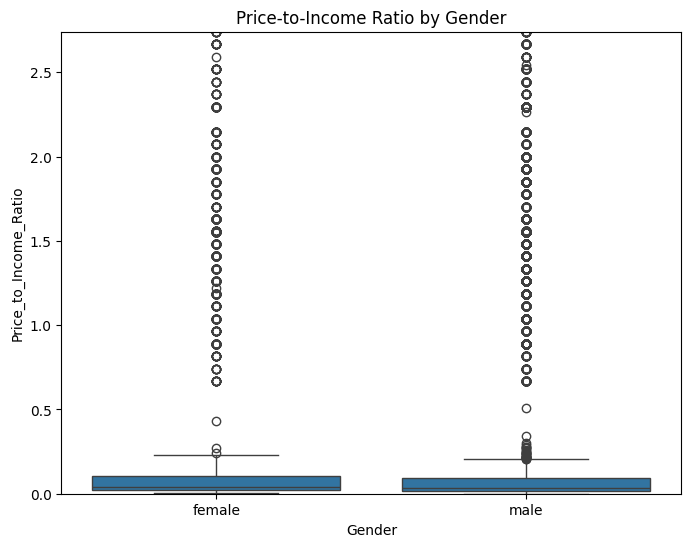

In [15]:
print("\n--- 5. Income vs. Spending Habits ---")

# Feature Engineering: Price-to-Income Ratio
# Handle potential division by zero or very low incomes if relevant in real data
df['Price_to_Income_Ratio'] = df['Price ($)'] / df['Annual Income'].replace(0, pd.NA) # Avoid division by zero
df.dropna(subset=['Price_to_Income_Ratio'], inplace=True) # Remove rows where income was 0

plt.figure(figsize=(10, 6))
sns.histplot(df['Price_to_Income_Ratio'], kde=True, bins=30)
plt.title('Distribution of Price-to-Income Ratio')
plt.xlabel('Price ($) / Annual Income')
plt.show()

print("\nDescriptive stats for Price-to-Income Ratio:")
print(df['Price_to_Income_Ratio'].describe())

# Price-to-Income Ratio by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Price_to_Income_Ratio', data=df)
plt.title('Price-to-Income Ratio by Gender')
plt.ylim(0, df['Price_to_Income_Ratio'].quantile(0.95)) # Limiting y for better visualization of boxes
plt.show()


--- 6. Segmentation (Exploratory K-Means Example) ---


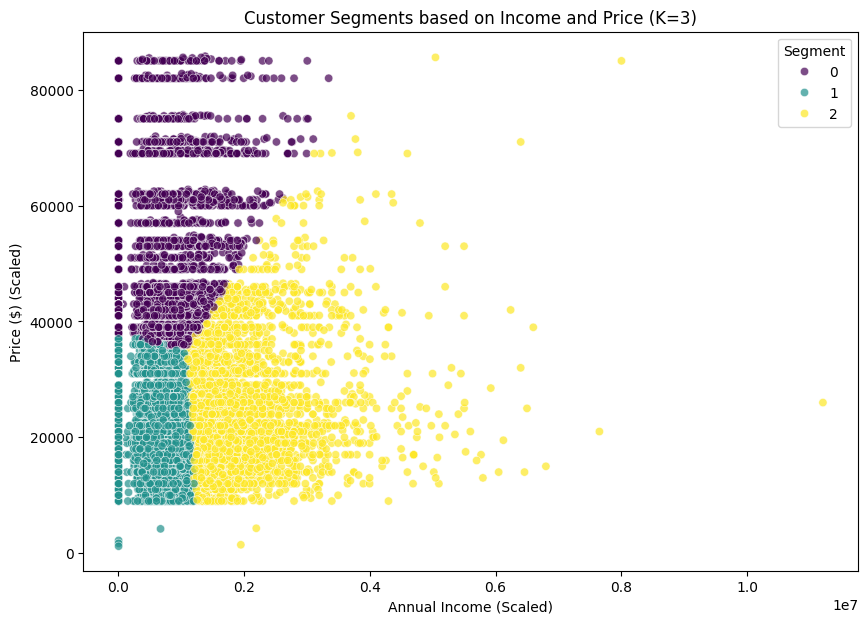


Segment sizes:
Segment
1    13702
2     5221
0     4982
Name: count, dtype: int64

Mean values per segment:
         Annual Income     Price ($)
Segment                             
0         6.921025e+05  51520.239261
1         5.094786e+05  21150.555685
2         1.806638e+06  23942.102854


In [16]:
print("\n--- 6. Segmentation (Exploratory K-Means Example) ---")
# Using 'Annual Income' and 'Price ($)' for a simple segmentation
# Note: Meaningful segmentation often requires more features and domain knowledge.

segment_df = df[['Annual Income', 'Price ($)']].copy()

# Scale the features
scaler = StandardScaler()
segment_scaled = scaler.fit_transform(segment_df)

# Determine optimal K (Elbow method - illustrative)
# inertia = []
# K_range = range(1, 10)
# for k in K_range:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
#     kmeans.fit(segment_scaled)
#     inertia.append(kmeans.inertia_)

# plt.figure(figsize=(8,5))
# plt.plot(K_range, inertia, marker='o')
# plt.xlabel('Number of clusters (K)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Optimal K')
# plt.show()
# (Visually inspect the plot for an "elbow" - let's assume K=3 for this example)

chosen_k = 3
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init='auto')
df['Segment'] = kmeans.fit_predict(segment_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Segment', data=df, palette='viridis', alpha=0.7)
plt.title(f'Customer Segments based on Income and Price (K={chosen_k})')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Price ($) (Scaled)')
plt.legend(title='Segment')
plt.show()

print("\nSegment sizes:")
print(df['Segment'].value_counts())

print("\nMean values per segment:")
print(df.groupby('Segment')[['Annual Income', 'Price ($)']].mean())

In [17]:
print("\n--- 7. Hypothesis Testing ---")
# Example: Is the average Price ($) significantly different between Genders?
# H0: Mean price for Male = Mean price for Female
# H1: Mean price for Male != Mean price for Female

male_prices = df[df['Gender'] == 'male']['Price ($)'] # Assuming 'male' and 'female' after cleaning
female_prices = df[df['Gender'] == 'female']['Price ($)']

# Perform two-sample t-test (assuming unequal variances for robustness: Welch's t-test)
if len(male_prices) > 1 and len(female_prices) > 1 : # need sufficient data
    t_stat, p_value = stats.ttest_ind(male_prices, female_prices, equal_var=False, nan_policy='omit')
    print(f"\nT-test for Price ($) between Genders:")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    alpha = 0.05
    if p_value < alpha:
        print(f"P-value ({p_value:.4f}) is less than alpha ({alpha}). Reject H0.")
        print("There is a statistically significant difference in average Price ($) between genders.")
    else:
        print(f"P-value ({p_value:.4f}) is greater than alpha ({alpha}). Fail to reject H0.")
        print("There is no statistically significant difference in average Price ($) between genders.")
else:
    print("\nNot enough data for one or both gender groups to perform t-test on Price ($).")


--- 7. Hypothesis Testing ---

T-test for Price ($) between Genders:
T-statistic: -1.0052
P-value: 0.3149
P-value (0.3149) is greater than alpha (0.05). Fail to reject H0.
There is no statistically significant difference in average Price ($) between genders.


In [18]:
print("\n--- 8. Outlier Investigation ---")

# Investigating outliers in 'Price ($)'
Q1_price = df['Price ($)'].quantile(0.25)
Q3_price = df['Price ($)'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

price_outliers = df[(df['Price ($)'] < lower_bound_price) | (df['Price ($)'] > upper_bound_price)]

print(f"\nNumber of potential outliers in Price ($): {len(price_outliers)}")
if not price_outliers.empty:
    print("Details of some Price ($) outliers:")
    print(price_outliers[['Car_id', 'Company', 'Model', 'Price ($)', 'Annual Income', 'Dealer_Region']].head())

    # You could then explore these outliers further, e.g., common companies, regions, etc.
    if not price_outliers.empty:
        print("\nCompanies most frequently associated with price outliers:")
        print(price_outliers['Company'].value_counts().head())


--- 8. Outlier Investigation ---

Number of potential outliers in Price ($): 1449
Details of some Price ($) outliers:
          Car_id     Company          Model  Price ($)  Annual Income  \
16  C_CND_009034     mercury  grand marquis      71101        1411000   
21  C_CND_012134     mercury  grand marquis      71001          13500   
22  C_CND_017684        ford        contour      62000         315000   
83  C_CND_011080  mercedes-b        s-class      85000         310000   
85  C_CND_020427      toyota         tacoma      82000        1300000   

   Dealer_Region  
16    middletown  
21        austin  
22    greenville  
83    janesville  
85    greenville  

Companies most frequently associated with price outliers:
Company
cadillac      170
ford          162
oldsmobile    132
mercury        99
plymouth       88
Name: count, dtype: int64



--- 9. Feature Engineering (Additional) ---

Sales Count by Quarter:
Sale_Quarter
2022Q1    1340
2022Q2    2240
2022Q3    2985
2022Q4    4079
2023Q1    1720
2023Q2    3025
2023Q3    3750
2023Q4    4766
Freq: Q-DEC, Name: count, dtype: int64


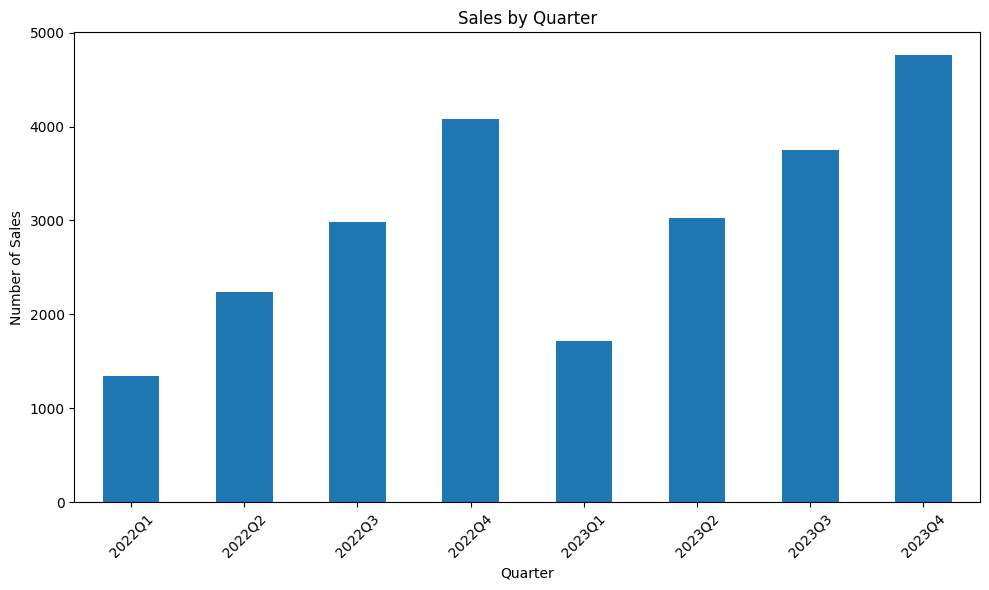


Sales on Weekend vs. Weekday:
Is_Weekend
False    65.492575
True     34.507425
Name: proportion, dtype: float64


C:\Users\favia\AppData\Local\Temp\ipykernel_21592\2875230615.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Is_Weekend', data=df, palette=['skyblue', 'lightcoral'])


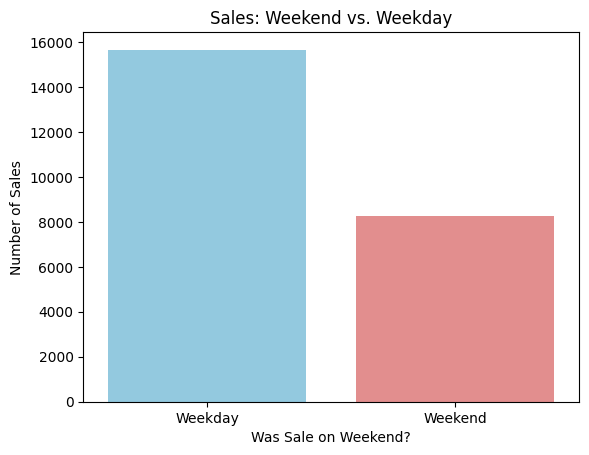



Deeper EDA Code Examples Complete.


In [19]:
print("\n--- 9. Feature Engineering (Additional) ---")

# Sales Quarter
df['Sale_Quarter'] = df['Date'].dt.to_period('Q') # Creates a Period object, e.g., 2023Q1
# For plotting or grouping, you might want it as a string:
# df['Sale_Quarter_str'] = df['Sale_Quarter'].astype(str)

print("\nSales Count by Quarter:")
print(df['Sale_Quarter'].value_counts().sort_index())
plt.figure(figsize=(10,6))
df.groupby('Sale_Quarter')['Car_id'].count().plot(kind='bar')
plt.title('Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Is Weekend Sale
df['Is_Weekend'] = df['Sale_Day_Name'].isin(['Saturday', 'Sunday'])
print("\nSales on Weekend vs. Weekday:")
print(df['Is_Weekend'].value_counts(normalize=True) * 100)

sns.countplot(x='Is_Weekend', data=df, palette=['skyblue', 'lightcoral'])
plt.title('Sales: Weekend vs. Weekday')
plt.xlabel('Was Sale on Weekend?')
plt.ylabel('Number of Sales')
plt.xticks([False, True], ['Weekday', 'Weekend'])
plt.show()


print("\n" + "="*50 + "\n")
print("Deeper EDA Code Examples Complete.")

Modelling

In [20]:
# Preprocessing & Metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# SOM
from minisom import MiniSom

# Deep Learning (Autoencoder)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Suppress warnings for cleaner output (optional)
import warnings
warnings.filterwarnings('ignore')


In [21]:
# --- 2. Feature Selection and Preprocessing for Clustering ---
# Select features relevant for customer segmentation
# For simplicity, we'll use a subset. In a real scenario, this requires careful consideration.
features_for_clustering = ['Annual Income', 'Price ($)', 'Gender', 'Body Style', 'Company', 'Dealer_Region']
segment_data = df[features_for_clustering].copy()

# Handle missing values (if any in selected columns - this sample shouldn't have them here)
segment_data.dropna(inplace=True)

# Identify categorical and numerical features
numerical_features = ['Annual Income', 'Price ($)']
categorical_features = ['Gender', 'Body Style', 'Company', 'Dealer_Region']

# Create preprocessing pipelines
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # sparse_output=False for easier use with some models
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Preprocess the data
X_processed = preprocessor.fit_transform(segment_data)
print(f"\nShape of processed data: {X_processed.shape}")




Shape of processed data: (23905, 46)


In [22]:
# --- 3. Modeling ---
n_clusters_fixed = 4 # Fixed number of clusters for models that require it (except DBSCAN)
results = [] # To store performance metrics
model_labels = {} # To store cluster labels from each model

# --- Model 1: K-Means ---
print("\nTraining K-Means...")
kmeans = KMeans(n_clusters=n_clusters_fixed, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_processed)
model_labels['K-Means'] = kmeans_labels

# --- Model 2: Agglomerative Hierarchical Clustering ---
print("Training Agglomerative Clustering...")
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_fixed)
agg_labels = agg_clustering.fit_predict(X_processed)
model_labels['Agglomerative'] = agg_labels

# --- Model 3: DBSCAN ---
# DBSCAN parameters need tuning. These are example values.
# For DBSCAN, n_clusters is determined by the algorithm.
print("Training DBSCAN...")
dbscan = DBSCAN(eps=1.5, min_samples=10) # eps and min_samples usually require careful tuning
dbscan_labels = dbscan.fit_predict(X_processed)
model_labels['DBSCAN'] = dbscan_labels
# Number of clusters in labels, ignoring noise if present.
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"DBSCAN found {n_clusters_dbscan} clusters (excluding noise).")


# --- Model 4: Gaussian Mixture Models (GMM) ---
print("Training Gaussian Mixture Model...")
gmm = GaussianMixture(n_components=n_clusters_fixed, random_state=42)
gmm_labels = gmm.fit_predict(X_processed)
model_labels['GMM'] = gmm_labels

# --- Model 5: Self-Organizing Maps (SOM) + K-Means on SOM output ---
print("Training Self-Organizing Map (SOM)...")
# SOM parameters
som_x_dim = 10
som_y_dim = 10
som = MiniSom(x=som_x_dim, y=som_y_dim, input_len=X_processed.shape[1], sigma=1.5, learning_rate=0.5, random_seed=42)
som.random_weights_init(X_processed)
som.train_batch(X_processed, num_iteration=1000, verbose=False) # Train SOM

# Get the feature map (quantization of the input data)
winner_coordinates = np.array([som.winner(x) for x in X_processed]).T
# Convert 2D coordinates to 1D index for easier K-Means application on map neurons
qnt = som.quantization(X_processed) # Get the quantized vectors (winning neuron weights for each input)

# Apply K-Means to the SOM quantized vectors (neuron activations)
som_kmeans = KMeans(n_clusters=n_clusters_fixed, random_state=42, n_init='auto')
som_labels = som_kmeans.fit_predict(qnt) # Use quantized vectors
model_labels['SOM + K-Means'] = som_labels

# --- Model 6: Simple Deep Learning (Autoencoder for feature learning + K-Means) ---
print("Training Autoencoder + K-Means...")
input_dim = X_processed.shape[1]
encoding_dim = 32 # Size of the latent space, can be tuned

# Autoencoder model
input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation='relu')(input_layer)
encoder = Dense(64, activation='relu')(encoder)
encoder_output = Dense(encoding_dim, activation='relu')(encoder) # Latent representation

decoder = Dense(64, activation='relu')(encoder_output)
decoder = Dense(128, activation='relu')(decoder)
decoder_output = Dense(input_dim, activation='sigmoid')(decoder) # Sigmoid if input scaled to 0-1, or linear

autoencoder = Model(inputs=input_layer, outputs=decoder_output)
encoder_model = Model(inputs=input_layer, outputs=encoder_output) # Separate encoder model

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
autoencoder.fit(X_processed, X_processed, epochs=50, batch_size=32, shuffle=True, verbose=0)

# Get latent representations (encoded features)
X_encoded = encoder_model.predict(X_processed, verbose=0)

# Apply K-Means to the encoded features
ae_kmeans = KMeans(n_clusters=n_clusters_fixed, random_state=42, n_init='auto')
ae_labels = ae_kmeans.fit_predict(X_encoded)
model_labels['Autoencoder + K-Means'] = ae_labels




Training K-Means...
Training Agglomerative Clustering...
Training DBSCAN...
DBSCAN found 2 clusters (excluding noise).
Training Gaussian Mixture Model...
Training Self-Organizing Map (SOM)...
Training Autoencoder + K-Means...


In [23]:
# --- 4. Performance Evaluation ---
print("\n--- Evaluating Models ---")

def evaluate_clustering(X, labels, model_name):
    # Filter out noise points for metrics if model is DBSCAN
    # Metrics generally don't handle -1 (noise) well.
    # We only evaluate if more than 1 cluster is found and not all points are noise.
    unique_labels = np.unique(labels)
    if model_name == 'DBSCAN':
        core_samples_mask = labels != -1
        X_eval = X[core_samples_mask]
        labels_eval = labels[core_samples_mask]
        n_clusters = len(set(labels_eval))
    else:
        X_eval = X
        labels_eval = labels
        n_clusters = len(set(labels_eval))

    if n_clusters > 1 and len(X_eval) > 0 and len(labels_eval) > 0:
        sil = silhouette_score(X_eval, labels_eval)
        db = davies_bouldin_score(X_eval, labels_eval)
        ch = calinski_harabasz_score(X_eval, labels_eval)
        return n_clusters, sil, db, ch
    else:
        print(f"Could not compute metrics for {model_name} (found {n_clusters} clusters/not enough samples). Assigning NaN.")
        return n_clusters, np.nan, np.nan, np.nan

performance_data = []
for name, labels_ in model_labels.items():
    data_for_eval = X_processed
    if name == 'Autoencoder + K-Means':
        data_for_eval = X_encoded # Evaluate AE on its latent space representation for consistency with its K-Means

    num_clust, sil, db, ch = evaluate_clustering(data_for_eval, labels_, name)
    performance_data.append({
        'Model': name,
        'Num Clusters Found': num_clust,
        'Silhouette Score': sil, # Higher is better (-1 to 1)
        'Davies-Bouldin Index': db, # Lower is better (>=0)
        'Calinski-Harabasz Index': ch # Higher is better
    })

performance_df = pd.DataFrame(performance_data)
print("\n--- Performance Comparison Table ---")
print(performance_df.to_string())




--- Evaluating Models ---

--- Performance Comparison Table ---
                   Model  Num Clusters Found  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Index
0                K-Means                   4          0.080912              2.814467              2926.811075
1          Agglomerative                   4          0.102883              2.277222              2637.798517
2                 DBSCAN                   2          0.349788              0.879454               121.948902
3                    GMM                   4          0.005137              5.939849               353.016989
4          SOM + K-Means                   4          0.102990              2.256233              2816.089302
5  Autoencoder + K-Means                   4          0.087173              2.548796              1952.474243


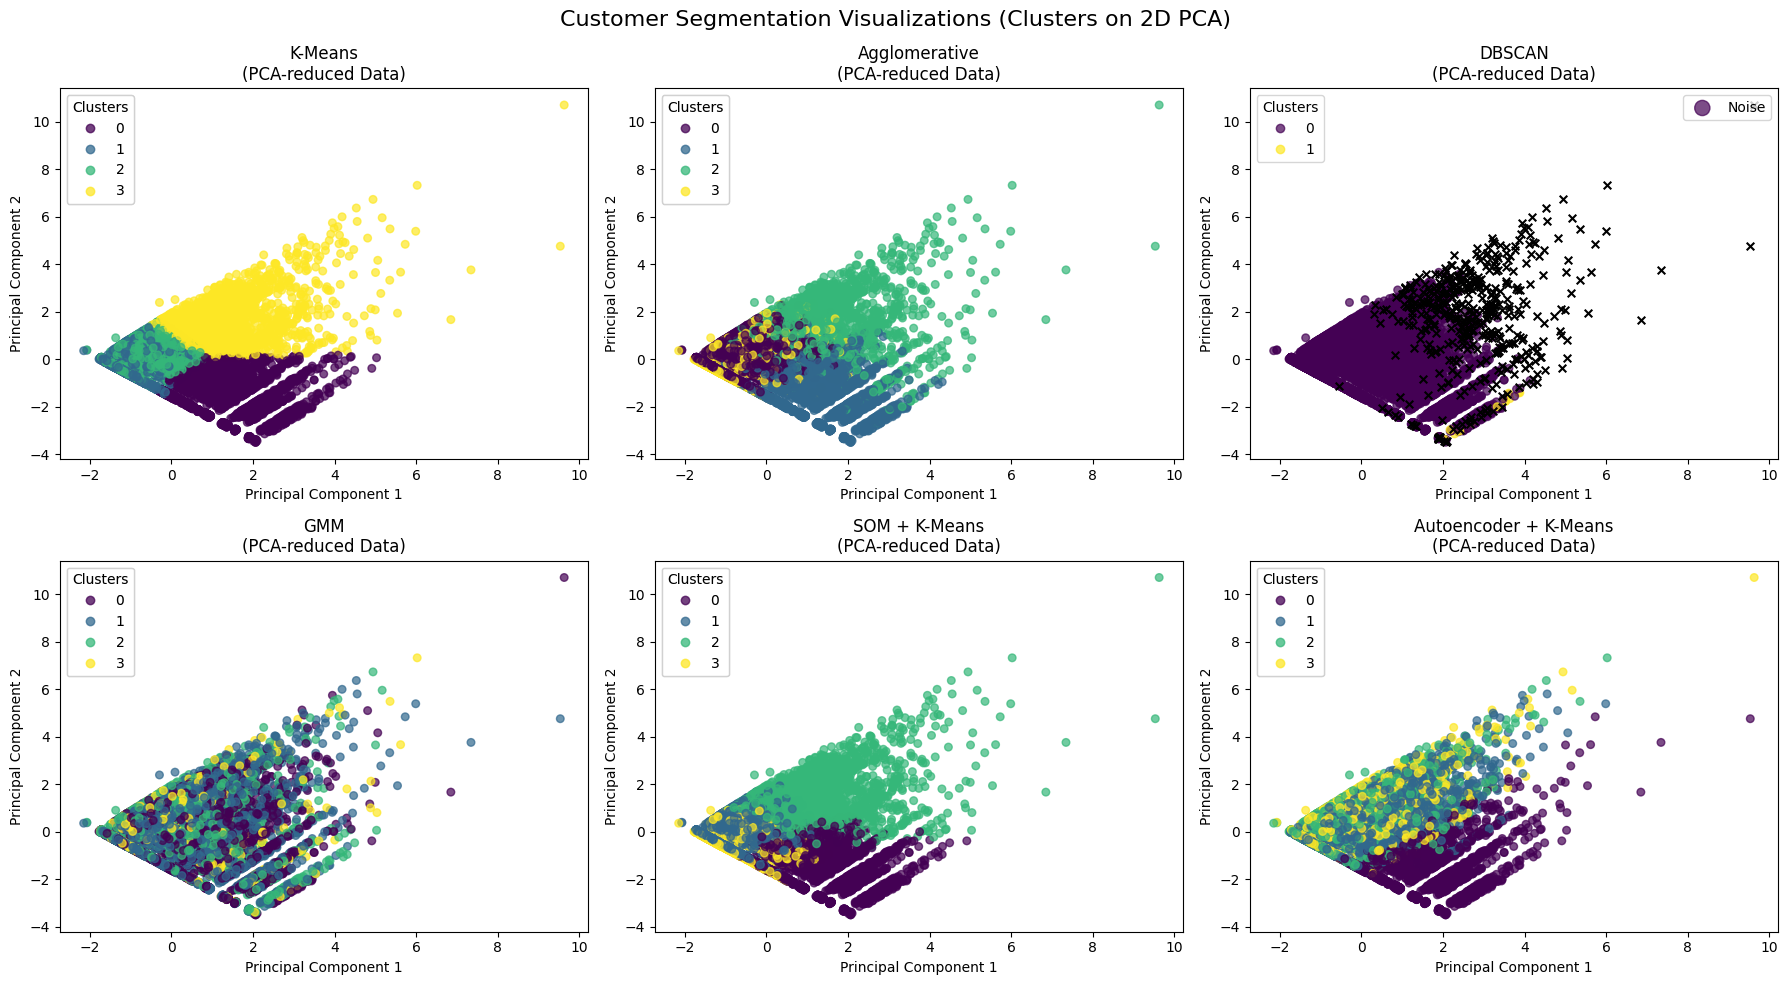

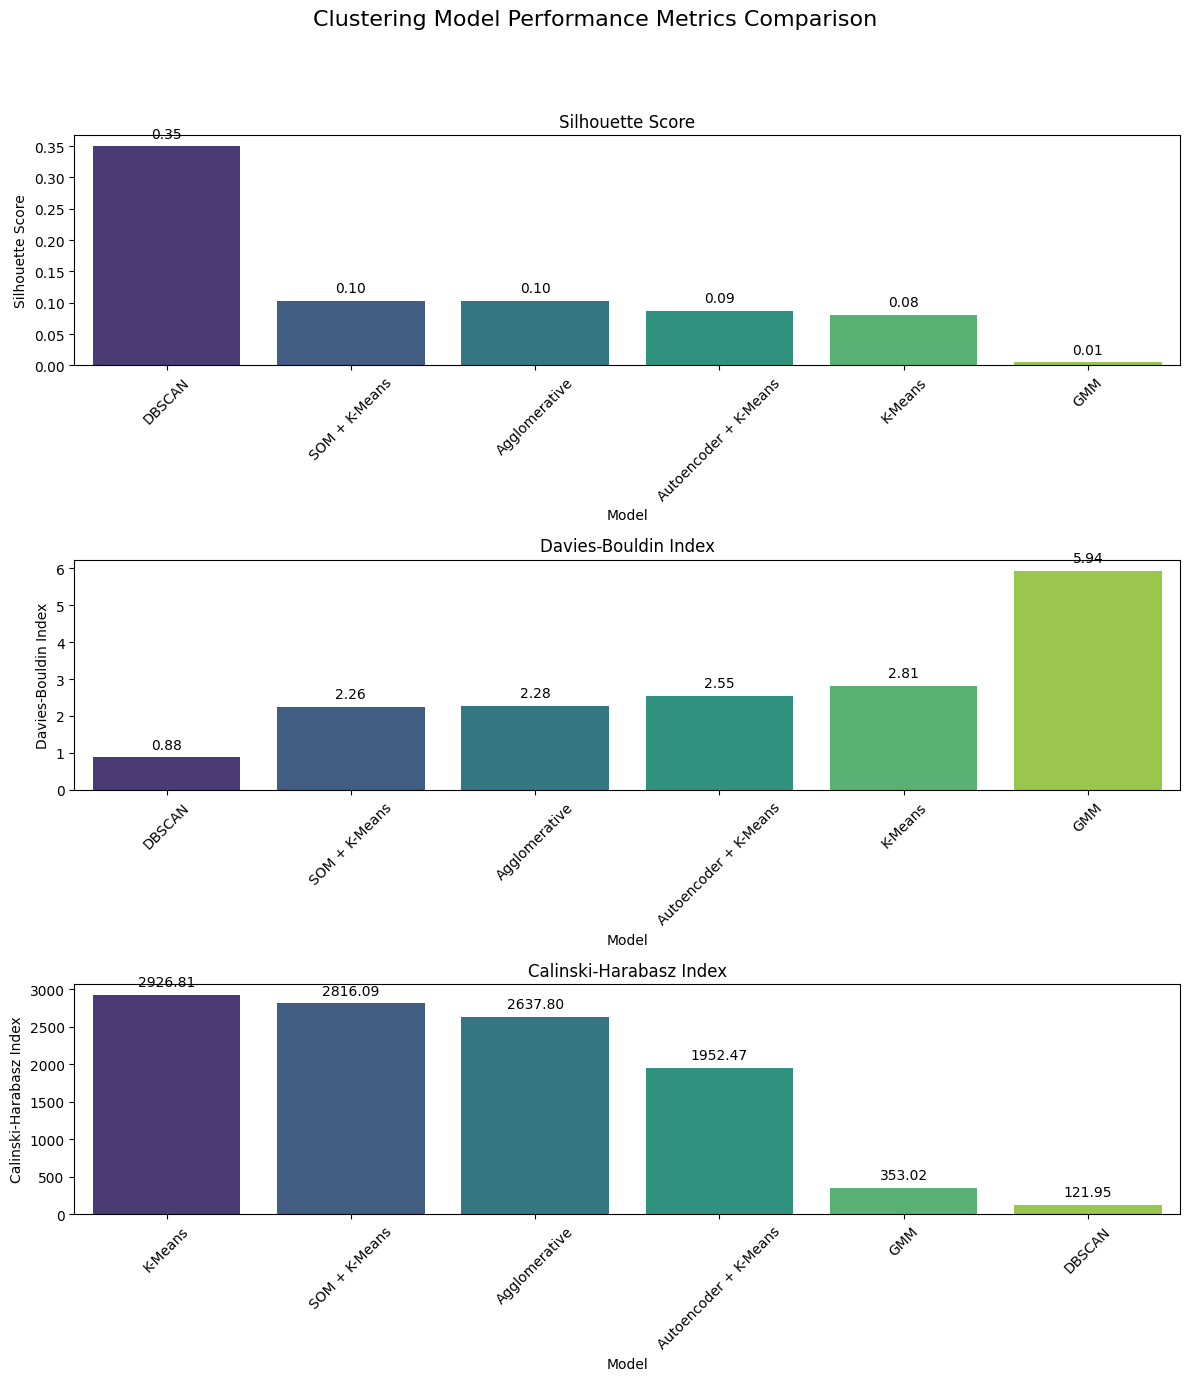

In [24]:
# --- 5. Visual Comparisons ---
# Reduce dimensionality for visualization using PCA (on the original processed data)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_processed)

num_models = len(model_labels)
fig, axes = plt.subplots(2, (num_models + 1) // 2, figsize=(18, 10)) # Adjust grid as needed
axes = axes.flatten() # Flatten to 1D array for easy iteration

for i, (name, labels_) in enumerate(model_labels.items()):
    ax = axes[i]
    unique_plot_labels = np.unique(labels_)
    
    # For DBSCAN, noise points (-1) are often plotted differently
    if name == 'DBSCAN' and -1 in unique_plot_labels:
        core_samples_mask = (labels_ != -1)
        noise_mask = (labels_ == -1)
        
        # Plot core samples
        scatter_core = ax.scatter(X_pca[core_samples_mask, 0], X_pca[core_samples_mask, 1],
                                  c=labels_[core_samples_mask], cmap='viridis', s=30, alpha=0.7)
        # Plot noise samples
        ax.scatter(X_pca[noise_mask, 0], X_pca[noise_mask, 1],
                   c='black', marker='x', s=30, label='Noise')
        if len(unique_plot_labels) > 1 or -1 in unique_plot_labels : # to avoid error if no core clusters
             legend1 = ax.legend(*scatter_core.legend_elements(), title="Clusters")
             ax.add_artist(legend1)
             if -1 in unique_plot_labels: ax.legend(['Noise'], loc='upper right', markerscale=2)

    else: # For other models
      if len(unique_plot_labels) > 1 : # Ensure there's more than one cluster to use cmap properly
        scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_, cmap='viridis', s=30, alpha=0.7)
        legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
        ax.add_artist(legend1)
      else: # Single cluster or all noise
        ax.scatter(X_pca[:, 0], X_pca[:, 1], c='gray', s=30, alpha=0.7, label=f'Cluster {unique_plot_labels[0]}')
        ax.legend()


    ax.set_title(f'{name}\n(PCA-reduced Data)')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust for suptitle
plt.suptitle('Customer Segmentation Visualizations (Clusters on 2D PCA)', fontsize=16)
plt.show()

# Bar chart for performance metrics
metrics_to_plot = ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index']
num_metrics = len(metrics_to_plot)

fig_perf, axes_perf = plt.subplots(num_metrics, 1, figsize=(12, num_metrics * 4.5)) # Tall figure
fig_perf.suptitle('Clustering Model Performance Metrics Comparison', fontsize=16, y=1.02)

for k, metric in enumerate(metrics_to_plot):
    # Sort models by metric value for better visualization
    # For Silhouette and Calinski-Harabasz, higher is better (sort descending)
    # For Davies-Bouldin, lower is better (sort ascending)
    ascending_sort = True if metric == 'Davies-Bouldin Index' else False
    sorted_perf_df = performance_df.sort_values(by=metric, ascending=ascending_sort).dropna(subset=[metric])

    sns.barplot(x='Model', y=metric, data=sorted_perf_df, ax=axes_perf[k], palette='viridis')
    axes_perf[k].set_title(metric)
    axes_perf[k].set_ylabel(metric)
    axes_perf[k].set_xlabel('Model')
    axes_perf[k].tick_params(axis='x', rotation=45)
    for p in axes_perf[k].patches:
        axes_perf[k].annotate(format(p.get_height(), '.2f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha = 'center', va = 'center',
                           xytext = (0, 9),
                           textcoords = 'offset points')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


Conclusion on Best Performing Model:

If your priority is to find highly distinct, dense core segments, and you're comfortable with some data points being labeled as "outliers" or "noise" because they don't clearly fit anywhere, DBSCAN performed best according to the Silhouette and Davies-Bouldin scores. It suggests the actual clusters DBSCAN did identify are of high quality in terms of cohesion and separation from their immediate neighbors.
If your priority is to segment all data points into a predefined number of clusters that are, on average, as distinct (far apart) and as internally compact (tight-knit) as possible on a global scale, K-Means performed best according to the Calinski-Harabasz Index.